# WWC Days of Code Kaggle Challenge

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from countryinfo import CountryInfo

from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

## Data Acquisition

In [2]:
data = pd.read_csv(r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\WWC_kaggle_challenge\world-data-2023.csv")
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [4]:
# Change the name of the columns for convenient

data.columns = ['Country', 'Population_Density', 'Abbreviation', 'Agricultural_Land(%)',
       'Land_Area(km2)', 'Armed_Forces_Size', 'Birth_Rate', 'Calling_Code',
       'Capital/MajorCity', 'Co2_Emissions', 'CPI', 'CPI_Change(%)',
       'Currency_Code', 'Fertility_Rate', 'Forested_Area(%)',
       'Gasoline Price($)', 'GDP($)', 'Gross_primary_edu_enrollment(%)',
       'Gross_tertiary_edu_enrollment(%)', 'Infant_Mortality',
       'Largest_City', 'Life_Expectancy', 'Maternal_mortality_ratio',
       'Minimum_Wage($)', 'Official_Language', 'Health_Expenditure(%)',
       'Physicians_per_thousand', 'Population',
       'Labor_force_participation(%)', 'Tax_Revenue(%)',
       'Total_Tax_Rate(%)', 'Unemployment_Rate(%)', 'Urban_Population', 'Latitude',
       'Longitude']

In [5]:
data.head()

,Country,Population_Density,Abbreviation,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Calling_Code,Capital/MajorCity,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Largest_City,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


Looking at the features, there are some features that we may not get insightful information such as `Abbreviation`, `Capital/MajorCity`, `Calling_Code`, and `Largest_City`. We will drop these features.

In [6]:
data.drop(columns=['Abbreviation', 'Capital/MajorCity', 'Calling_Code', 'Largest_City'], inplace=True)

data.head(10)

,Country,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,20.50%,443,0,15.33,557,113.81,1.20%,XCD,1.99,22.30%,$0.99,"$1,727,759,259",105.00%,24.80%,5.0,76.9,42.0,$3.04,English,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,54.30%,"2,780,400","105,000",17.02,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,58.90%,"29,743","49,000",13.99,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,48.20%,"7,741,220","58,000",12.60,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,82.7,6.0,$13.59,NaN,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,32.40%,"83,871","21,000",9.70,"61,448",118.06,1.50%,EUR,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,2.9,81.6,5.0,NaN,German,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


Now we will remove the % and $ signs from the values so that the data types for the features are correct.

In [7]:
symbol_columns = []

for column in data.columns:
    if '%' in column:
        symbol_columns.append(column)
    elif '$' in column:
        symbol_columns.append(column)

symbol_columns

['Agricultural_Land(%)',
 'CPI_Change(%)',
 'Forested_Area(%)',
 'Gasoline Price($)',
 'GDP($)',
 'Gross_primary_edu_enrollment(%)',
 'Gross_tertiary_edu_enrollment(%)',
 'Minimum_Wage($)',
 'Health_Expenditure(%)',
 'Labor_force_participation(%)',
 'Tax_Revenue(%)',
 'Total_Tax_Rate(%)',
 'Unemployment_Rate(%)']

In [8]:
def remove_symbol(df, columns):
    for column in columns:
        df[column] = df[column].str.replace("%", "")
        df[column] = df[column].str.replace("$", "")
        df[column] = df[column].str.replace(",", "")
        df[column] = df[column].astype('float')
    return df

In [9]:
data = remove_symbol(data, symbol_columns)

In [10]:
data.head()

,Country,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
0,Afghanistan,60,58.1,"652,230","323,000",32.49,"8,672",149.9,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,Pashto,78.4,0.28,"38,041,754",48.9,9.3,71.4,11.12,"9,797,273",33.939110,67.709953
1,Albania,105,43.1,"28,748","9,000",11.78,"4,536",119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,Albanian,56.9,1.20,"2,854,191",55.7,18.6,36.6,12.33,"1,747,593",41.153332,20.168331
2,Algeria,18,17.4,"2,381,741","317,000",24.28,"150,006",151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,Arabic,28.1,1.72,"43,053,054",41.2,37.2,66.1,11.70,"31,510,100",28.033886,1.659626
3,Andorra,164,40.0,468,NaN,7.20,469,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,Catalan,36.4,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,47.5,"1,246,700","117,000",40.73,"34,693",261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,Portuguese,33.4,0.21,"31,825,295",77.5,9.2,49.1,6.89,"21,061,025",-11.202692,17.873887


In [11]:
def change_obj_num(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(",", "")
        df[column] = df[column].astype('float')
    return df

In [12]:
data = change_obj_num(data, ['Population_Density','Land_Area(km2)','Armed_Forces_Size','Co2_Emissions','CPI','Population','Urban_Population'])
data.head()

,Country,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,40.0,468.0,NaN,7.20,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [13]:
# Now all the features are in correct data type.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           195 non-null    object 
 1   Population_Density                195 non-null    float64
 2   Agricultural_Land(%)              188 non-null    float64
 3   Land_Area(km2)                    194 non-null    float64
 4   Armed_Forces_Size                 171 non-null    float64
 5   Birth_Rate                        189 non-null    float64
 6   Co2_Emissions                     188 non-null    float64
 7   CPI                               178 non-null    float64
 8   CPI_Change(%)                     179 non-null    float64
 9   Currency_Code                     180 non-null    object 
 10  Fertility_Rate                    188 non-null    float64
 11  Forested_Area(%)                  188 non-null    float64
 12  Gasoline

### Categorical Features

In [14]:
data.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            195 non-null    object
 1   Currency_Code      180 non-null    object
 2   Official_Language  190 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [15]:
missing_currency = data[data['Currency_Code'].isna()]['Country'].values
missing_currency = list(missing_currency)

currency_code = []

for currency in missing_currency:
    try:
        country = CountryInfo(currency)
        correct_currency = country.currencies()[0]
        currency_code.append(correct_currency)
    except:
        currency_code.append('Unknown')

currency_code

['BSD',
 'BTN',
 'KHR',
 'XAF',
 'SVC',
 'Unknown',
 'JPY',
 'LSL',
 'LRD',
 'MVR',
 'NAD',
 'EUR',
 'Unknown',
 'PAB',
 'USD']

In [16]:
def fillin_values(df, column, value_list):
    missing_indices = df[df[column].isna()].index

    for values_index, missing_index in enumerate(missing_indices):
        if values_index < len(value_list):
            df.at[missing_index, column] = value_list[values_index]
        else:
            break

In [17]:
fillin_values(data, 'Currency_Code', currency_code)

In [18]:
data[data['Official_Language'].isna()]

,Country,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
8,Australia,3.0,48.2,7741220.0,58000.0,12.60,375908.0,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,82.7,6.0,13.59,NaN,19.6,3.68,25766605.0,65.5,23.0,47.4,5.27,21844756.0,-25.274398,133.775136
85,Japan,347.0,12.3,377944.0,261000.0,7.40,1135886.0,105.48,0.5,JPY,1.42,68.5,1.06,5.081770e+12,98.8,63.2,1.8,84.2,5.0,6.77,NaN,13.1,2.41,126226568.0,61.7,11.9,46.7,2.29,115782416.0,36.204824,138.252924
110,Mexico,66.0,54.6,1964375.0,336000.0,17.60,486406.0,141.54,3.6,MXN,2.13,33.9,0.73,1.258287e+12,105.8,40.2,11.0,75.0,33.0,0.49,NaN,41.4,2.38,126014024.0,60.7,13.1,55.1,3.42,102626859.0,23.634501,-102.552784
150,S�����������,228.0,50.7,964.0,1000.0,31.54,121.0,185.09,7.9,STN,4.32,55.8,NaN,4.290166e+08,106.8,13.4,24.4,70.2,130.0,NaN,NaN,11.7,0.05,215056.0,57.8,14.6,37.0,13.37,158277.0,NaN,NaN
186,United States,36.0,44.4,9833517.0,1359000.0,11.60,5006302.0,117.24,7.5,USD,1.73,33.9,0.71,2.142770e+13,101.8,88.2,5.6,78.5,19.0,7.25,NaN,11.1,2.61,328239523.0,62.0,9.6,36.6,14.70,270663028.0,37.090240,-95.712891


In [19]:
# Fix the country name correctly.

data['Country'] = np.where((data['Currency_Code']=='STN'), 'Sao Tome and Principe', data['Country'])

In [20]:
''' Having a fundamental understanding of the official languages used by the missing countries, 
I will provide the values based on my knowledge, with the exception of Sao Tome and Principe.'''

languages = ['English','Japanese','Spanish','Unknown','English']

fillin_values(data, 'Official_Language', languages)

In [21]:
data.select_dtypes('object').isna().sum()

Country              0
Currency_Code        0
Official_Language    0
dtype: int64

### Numeric Features

In [22]:
data.select_dtypes('float')

,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
0,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,164.0,40.0,468.0,NaN,7.20,469.0,NaN,NaN,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,NaN,NaN,6.63,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.0,24.5,912050.0,343000.0,17.88,164175.0,2740.27,254.9,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,72.1,125.0,0.01,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730
191,314.0,39.3,331210.0,522000.0,16.75,192668.0,163.52,2.8,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,75.3,43.0,0.73,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,56.0,44.6,527968.0,40000.0,30.45,10609.0,157.58,8.1,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,66.1,164.0,NaN,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388
193,25.0,32.1,752618.0,16000.0,36.19,5141.0,212.31,9.2,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,63.5,213.0,0.24,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [23]:
data.select_dtypes('float').isna().sum()

Population_Density                   0
Agricultural_Land(%)                 7
Land_Area(km2)                       1
Armed_Forces_Size                   24
Birth_Rate                           6
Co2_Emissions                        7
CPI                                 17
CPI_Change(%)                       16
Fertility_Rate                       7
Forested_Area(%)                     7
Gasoline Price($)                   20
GDP($)                               2
Gross_primary_edu_enrollment(%)      7
Gross_tertiary_edu_enrollment(%)    12
Infant_Mortality                     6
Life_Expectancy                      8
Maternal_mortality_ratio            14
Minimum_Wage($)                     45
Health_Expenditure(%)                7
Physicians_per_thousand              7
Population                           1
Labor_force_participation(%)        19
Tax_Revenue(%)                      26
Total_Tax_Rate(%)                   12
Unemployment_Rate(%)                19
Urban_Population         

In [24]:
# Fill in missing value in the latitude, longitude columns

data['Latitude'].fillna(0, inplace=True)
data['Longitude'].fillna(0, inplace=True)

In [25]:
# Fill in missing values with median

numeric_features = data.select_dtypes('float').columns

for column in numeric_features:
    data[column] = data[column].fillna(data[column].median())

In [26]:
data.describe()

,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
count,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000
mean,356.764103,39.134872,6.867007e+05,1.434872e+05,20.145282,1.718583e+05,184.783744,6.359487,2.681872,32.014872,1.000154,4.727532e+11,102.473077,37.547179,21.107179,72.317436,152.682051,1.928949,32.567692,1.826205,3.922447e+07,62.710000,16.537436,40.599487,6.737641,2.185258e+07,18.994442,20.128678
std,1982.888967,21.386637,1.917085e+06,3.588039e+05,9.798615,8.240967e+05,380.557800,23.452045,1.261755,23.358162,0.349395,2.161411e+12,12.912165,28.388404,19.285229,7.330019,226.629794,2.648408,18.827087,1.655113,1.447345e+08,9.975707,6.479029,19.930828,4.845382,7.450449e+07,23.939018,66.559711
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,35.500000,22.650000,2.445650e+04,1.250000e+04,11.450000,2.625500e+03,114.470000,1.050000,1.710000,11.450000,0.790000,8.476801e+09,99.350000,12.650000,6.100000,67.450000,16.500000,0.530000,17.700000,0.360000,2.004434e+06,57.250000,12.550000,30.900000,3.590000,1.218046e+06,4.372880,-7.658537
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,1.230300e+04,125.340000,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.189877,20.939444
75%,216.500000,54.850000,5.205440e+05,1.230000e+05,28.445000,6.194100e+04,155.605000,3.750000,3.565000,47.450000,1.185000,2.304710e+11,107.550000,61.100000,31.550000,77.250000,175.000000,1.625000,43.750000,2.875000,2.856227e+07,68.300000,20.300000,47.300000,8.840000,1.460139e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


In [27]:
data.isna().sum().sum()

0

In [28]:
data.head()

,Country,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),GDP($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,40.0,468.0,31000.0,7.20,469.0,125.34,2.3,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,73.2,53.0,6.63,Catalan,36.4,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [29]:
data['GDP($B)'] = round((data['GDP($)']/1000000000), 2) # Divide by billion to scale down the value.

In [30]:
data.drop(columns='GDP($)', inplace=True)

## Data Visualization

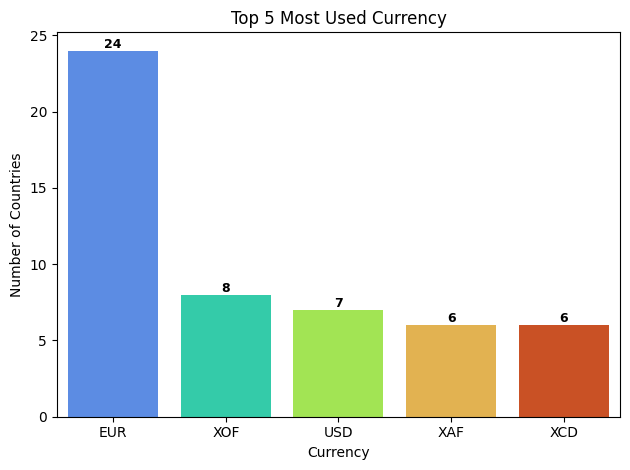

In [31]:
top_5_currency = data.groupby('Currency_Code')['Country'].count().reset_index().rename(columns={'Country':'Count'}).sort_values(by='Count', ascending=False)[:5]
ax = sns.barplot(x=top_5_currency['Currency_Code'], y=top_5_currency['Count'], palette='turbo')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=9)
plt.xlabel("Currency")
plt.ylabel("Number of Countries")
plt.title("Top 5 Most Used Currency")
plt.tight_layout()
plt.show()

- EUR: Euro, used by 24 countries out of 195 countries.
- XOF: West African franc, used by 8 countries out of 195 countries.
- USD: US Dollar, used by 7 countries out of 195 countries.
- XAF: Central African franc, used by 6 countries out of 195 countries.
- XCD: East Caribbean Dollar, used by 6 countries out of 195 countries.

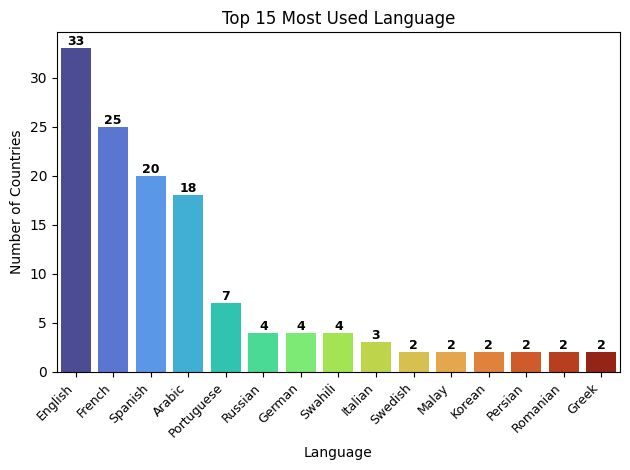

In [32]:
top_15_language = data.groupby('Official_Language')['Country'].count().reset_index().rename(columns={'Country':'Count'}).sort_values(by='Count', ascending=False)[:15]
ax = sns.barplot(x=top_15_language['Official_Language'], y=top_15_language['Count'], palette='turbo')
ax.bar_label(ax.containers[0], label_type='edge', fontweight='bold', fontsize=9)
plt.xlabel("Language")
plt.ylabel("Number of Countries")
plt.title("Top 15 Most Used Language")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

The most widely used official language among the 195 countries is English, followed by French and Spanish. The prevalence of these top three languages is rooted in their histories of colonization, which significantly influenced the global dissemination of their respective languages. In the case of Arabic, it serves as an official language for numerous countries in the Middle East and North Africa.

In [33]:
def create_barplot_top(df, x_feature, y_feature, number_country, **kwargs):
    top_countries = df.sort_values(by=y_feature, ascending=False)[:number_country]
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_countries[x_feature], y=top_countries[y_feature], **kwargs)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top {number_country} Countries by the {y_feature}")
    plt.tight_layout()
    plt.show()

In [34]:
def create_barplot_bottom(df, x_feature, y_feature, number_country, **kwargs):
    top_countries = df.sort_values(by=y_feature)[:number_country]
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_countries[x_feature], y=top_countries[y_feature], **kwargs)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Low {number_country} Countries by the {y_feature}")
    plt.tight_layout()
    plt.show()

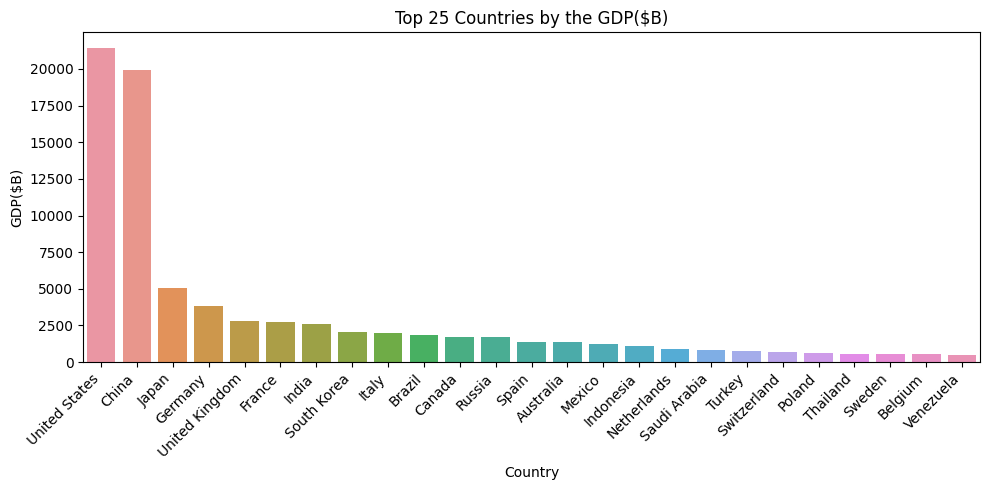

In [35]:
create_barplot_top(data, 'Country', 'GDP($B)', 25)

The United States boasts the world's largest GDP, followed by China in the second position. Japan holds the third spot in terms of GDP, as indicated by the visualization. Notably, there is a substantial gap between the GDP of the second and third-ranking countries. 

Within the top 10 highest GDP countries, three are situated in Asia: Japan, India, and South Korea. It is noteworthy that Japan, despite being an island nation, has attained the third-highest GDP among 195 countries. South Korea, despite its relatively small size and ongoing tensions with North Korea, has achieved a notable economic standing. India, recognized globally for its prowess in technological education, is poised for positive growth in the future.

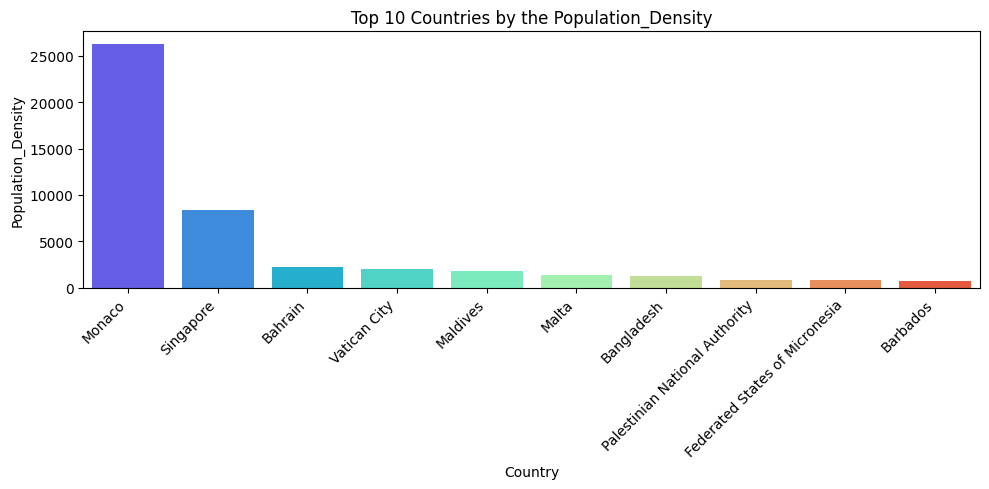

In [36]:
create_barplot_top(data, 'Country', 'Population_Density', 10, palette='rainbow')

The plot illustrates that Monaco boasts the highest population density. Notably, Monaco is recognized as the second-smallest sovereign country globally, following Vatican City, which holds the fourth position in terms of the highest population density.

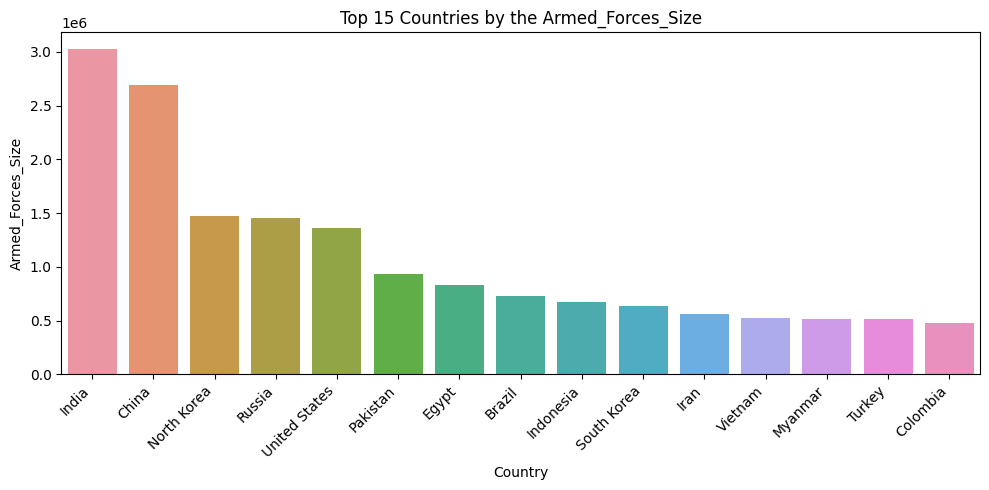

In [37]:
create_barplot_top(data, 'Country', 'Armed_Forces_Size', 15)

Observing the chart provided, it becomes evident that India and China possess the largest armed forces sizes, a trend likely influenced by their vast populations, both exceeding 1.4 billion people. North Korea claims the third spot, a circumstance attributed to the societal emphasis on mandatory service and national contribution for a decent standard of living. Following closely are Russia and the United States, with the latter notably recognized for allocating the highest military expenditure, nearly reaching 750 billion dollars.

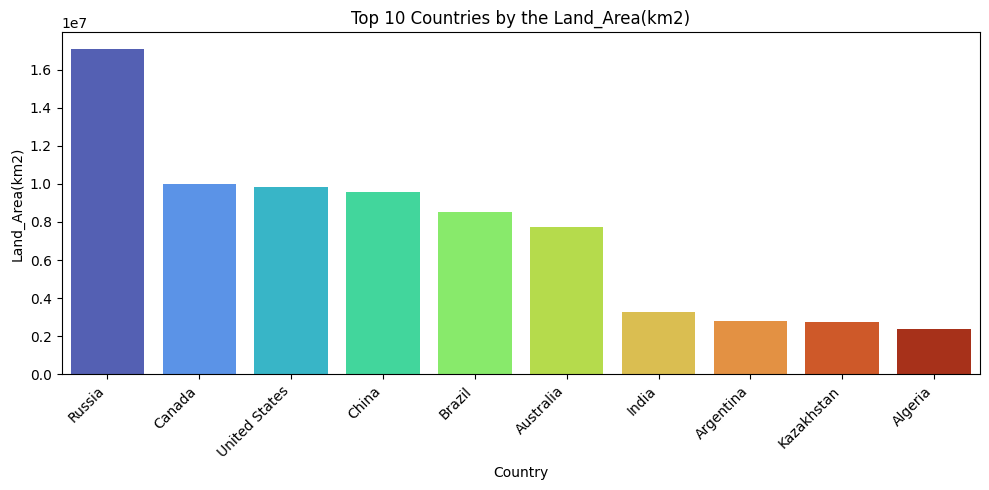

In [38]:
create_barplot_top(data, 'Country', 'Land_Area(km2)', 10, palette='turbo')

Russia holds the title for the largest land area, followed by Canada, the United States, China, Brazil, and Australia in consecutive order. The visual representation above underscores a substantial gap in land area size between the top-ranked country and the subsequent one.

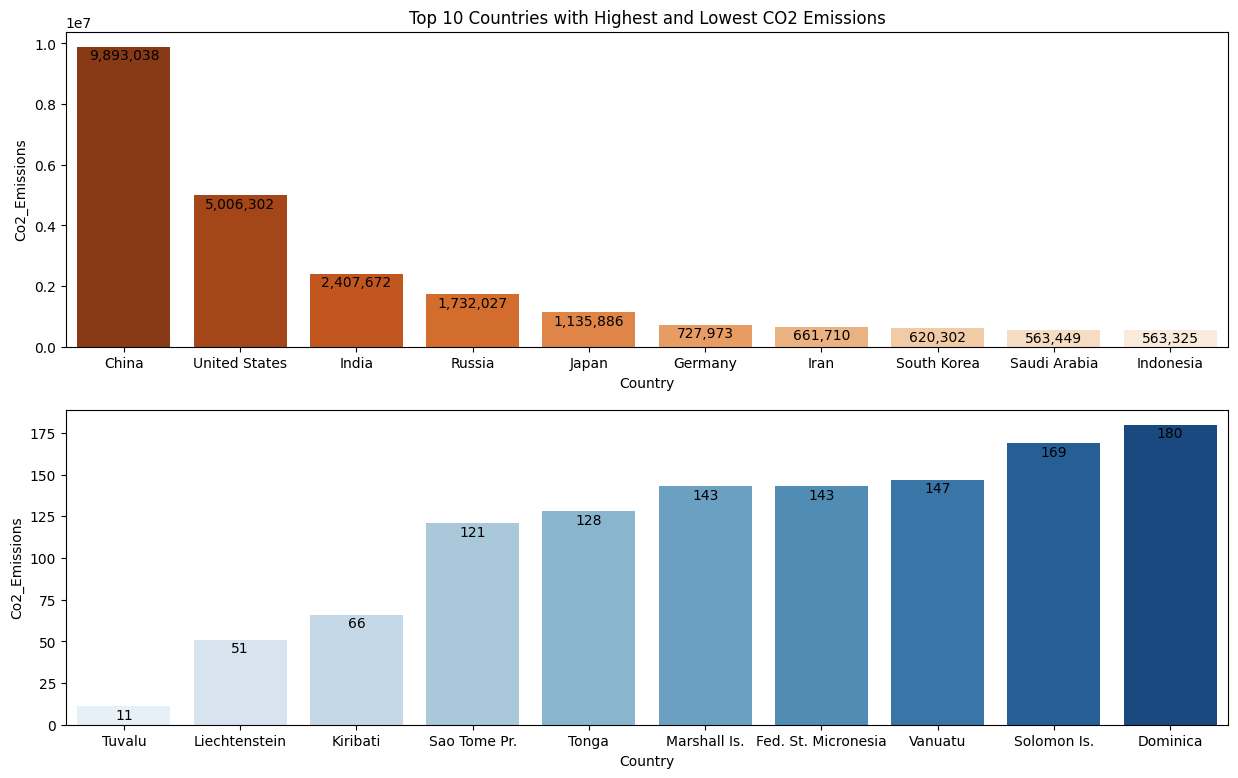

In [39]:
fig, axes = plt.subplots(2,1, figsize=(15,9))

top_co2 = data.sort_values(by='Co2_Emissions', ascending=False)[:10]
sns.barplot(data=top_co2, x='Country', y='Co2_Emissions', palette='Oranges_r', ax= axes[0])
axes[0].set_title("Top 10 Countries with Highest and Lowest CO2 Emissions")

bottom_co2 = data.sort_values(by='Co2_Emissions')[:10]
sns.barplot(data=bottom_co2, x='Country', y='Co2_Emissions', palette='Blues', ax= axes[1])
axes[1].tick_params(axis='x', labelsize=10)
axes[1].set_xticklabels(['Tuvalu','Liechtenstein','Kiribati','Sao Tome Pr.', 'Tonga','Marshall Is.','Fed. St. Micronesia','Vanuatu','Solomon Is.','Dominica'],ha="center")

for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='top', xytext=(0, -1.5), textcoords='offset points')

plt.show()

China ranks as the country with the highest CO2 emissions, attributed to its numerous factories and the widespread use of coal briquettes in many rural areas. Following closely in second place is the United States, which is actively transitioning toward greener energy sources. On the contrary, Tuvalu boasts the lowest CO2 emissions, being the world's fourth smallest country with a limited population.

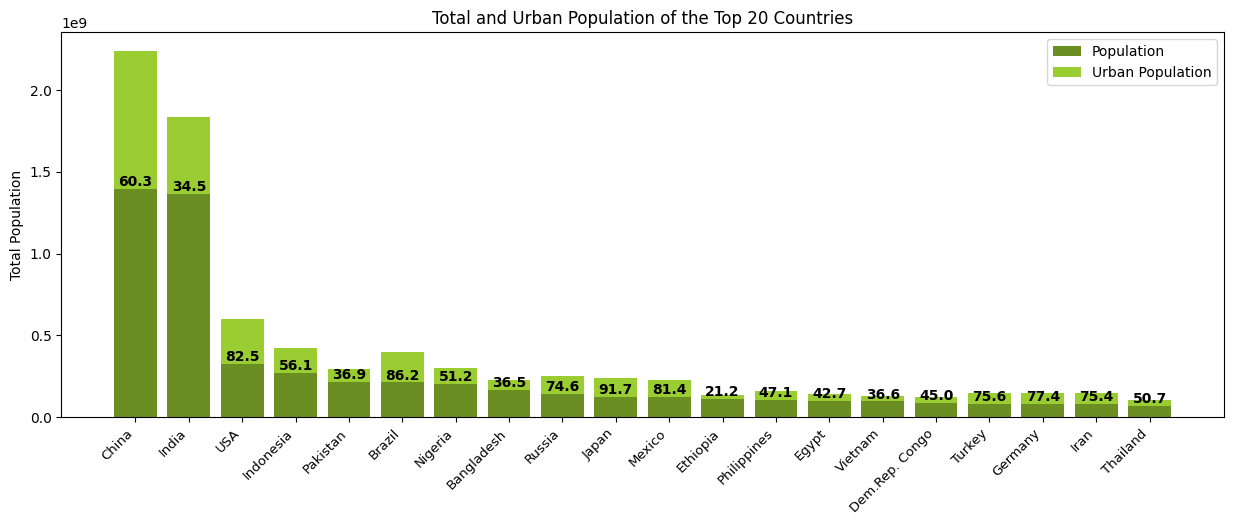

In [40]:
population = data.sort_values(by='Population', ascending=False)[:20]
urb_rate = round((population['Urban_Population']/population['Population'])*100,1).values

fig, ax = plt.subplots(figsize=(15,5))

ax.bar(population['Country'], population['Population'], color='olivedrab')
ax.bar(population['Country'], population['Urban_Population'], bottom=population['Population'], color='yellowgreen')

ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(0,20))
ax.set_xticklabels(['China', 'India', 'USA', 'Indonesia', 'Pakistan',
       'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Japan', 'Mexico',
       'Ethiopia', 'Philippines', 'Egypt', 'Vietnam',
       'Dem.Rep. Congo', 'Turkey', 'Germany', 'Iran',
       'Thailand'], ha='right', fontsize=9.5)

for i, (pop, urban_pop) in enumerate(zip(population['Population'], urb_rate)):
    ax.text(i, pop + urban_pop, f'{urban_pop}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel("Total Population")
ax.set_title("Total and Urban Population of the Top 20 Countries")
plt.legend(['Population','Urban Population'])

plt.show()

China holds the top spot for the highest population, with India coming in second. The United States takes the third position. In China, approximately 60.3% of the population resides in urban areas, while in India, this figure is 34.5%. The United States surpasses both, with over 80% of its population living in urban areas. Japan stands out as the country with the highest urban population (about 91.7%), with a significant concentration of people in cities such as Tokyo and Osaka.

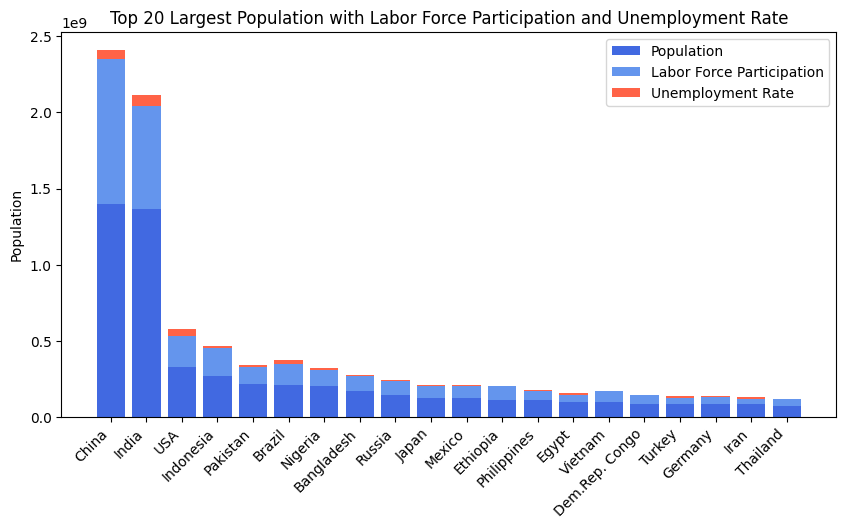

In [41]:
fig, ax = plt.subplots(figsize=(10,5))

labor_force = population['Population'] * (population['Labor_force_participation(%)']/100)
unemp = population['Population'] * (population['Unemployment_Rate(%)']/100)

ax.bar(population['Country'], population['Population'], color='royalblue')
ax.bar(population['Country'], labor_force, bottom=population['Population'], color='cornflowerblue')
ax.bar(population['Country'], unemp, bottom=population['Population']+ labor_force, color='tomato')

ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(0,20))
ax.set_xticklabels(['China', 'India', 'USA', 'Indonesia', 'Pakistan',
       'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Japan', 'Mexico',
       'Ethiopia', 'Philippines', 'Egypt', 'Vietnam',
       'Dem.Rep. Congo', 'Turkey', 'Germany', 'Iran',
       'Thailand'], ha='right')

ax.set_ylabel("Population")
ax.set_title("Top 20 Largest Population with Labor Force Participation and Unemployment Rate")
plt.legend(['Population','Labor Force Participation', 'Unemployment Rate'])

plt.show()

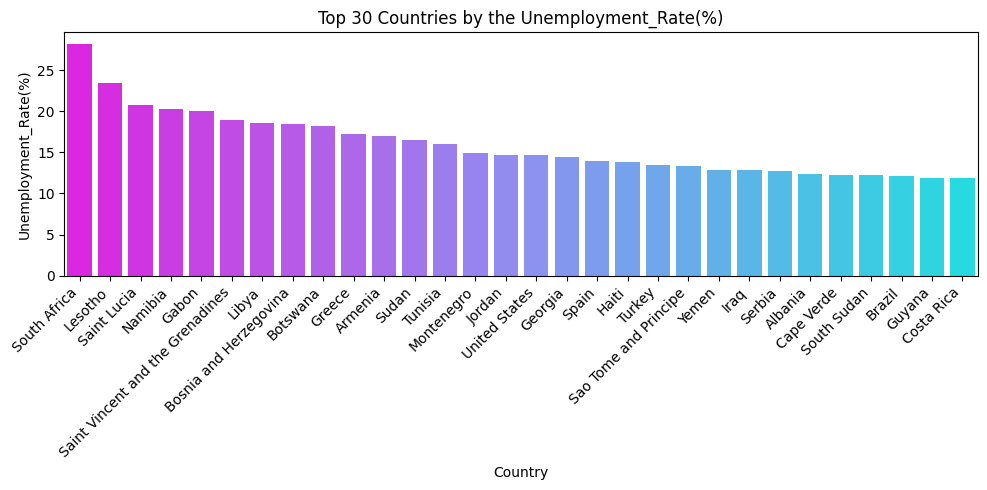

In [42]:
create_barplot_top(data, 'Country', 'Unemployment_Rate(%)', 30, palette='cool_r')

The top 20 countries with the highest population generally do not exhibit exceptionally high unemployment rates. However, among the top 5 countries with the highest unemployment rates are South Africa, Lesotho, Saint Lucia, Namibia, and Gabon. Notably, the United States is ranked 16th in terms of unemployment rates within this context.

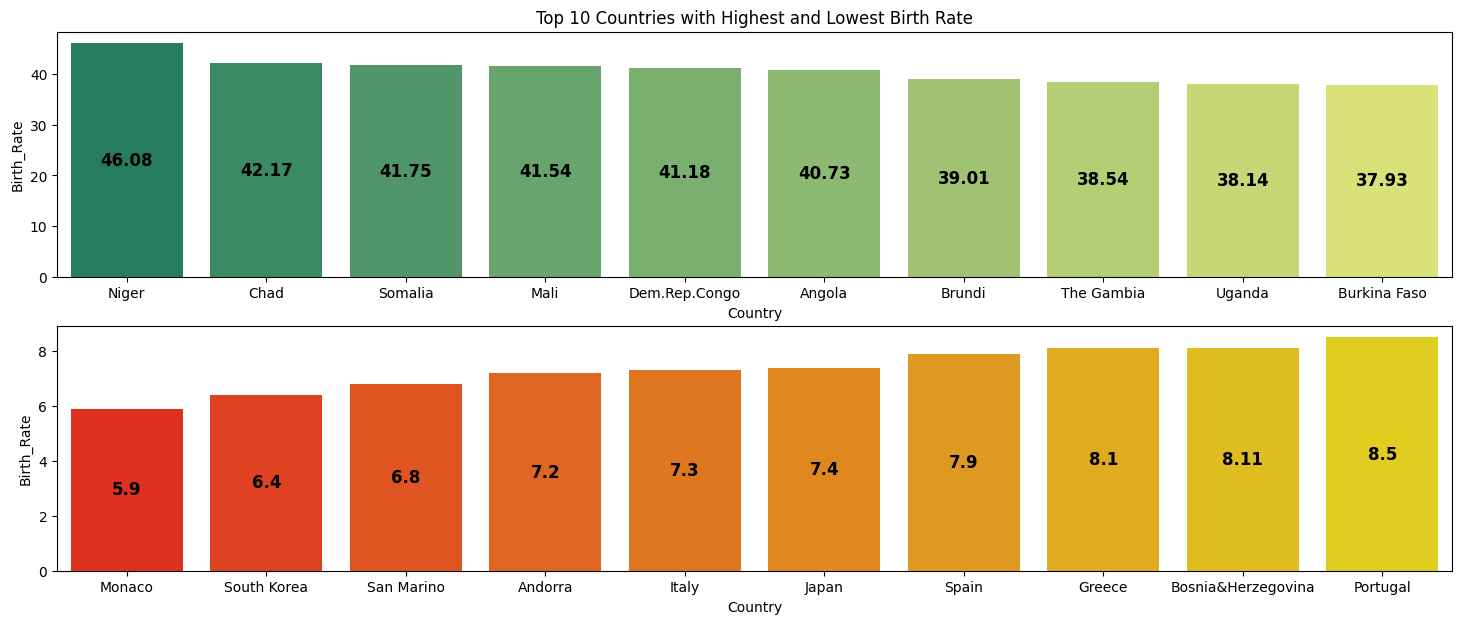

In [43]:
fig, axes = plt.subplots(2,1, figsize=(18,7))

top_br = data.sort_values(by='Birth_Rate', ascending=False)[:10]
sns.barplot(data=top_br, x='Country', y='Birth_Rate', palette='summer', ax= axes[0])
axes[0].set_xticklabels(['Niger','Chad','Somalia','Mali', 'Dem.Rep.Congo','Angola','Brundi','The Gambia','Uganda','Burkina Faso'], ha="center")
axes[0].bar_label(axes[0].containers[0], label_type='center', fontweight='bold', fontsize=12)
axes[0].set_title("Top 10 Countries with Highest and Lowest Birth Rate")

bottom_br = data.sort_values(by='Birth_Rate')[:10]
sns.barplot(data=bottom_br, x='Country', y='Birth_Rate', palette='autumn', ax= axes[1])
axes[1].set_xticklabels(['Monaco','South Korea','San Marino','Andorra', 'Italy','Japan','Spain','Greece','Bosnia&Herzegovina','Portugal'], ha="center")
axes[1].bar_label(axes[1].containers[0], label_type='center', fontweight='bold', fontsize=12)

plt.show()

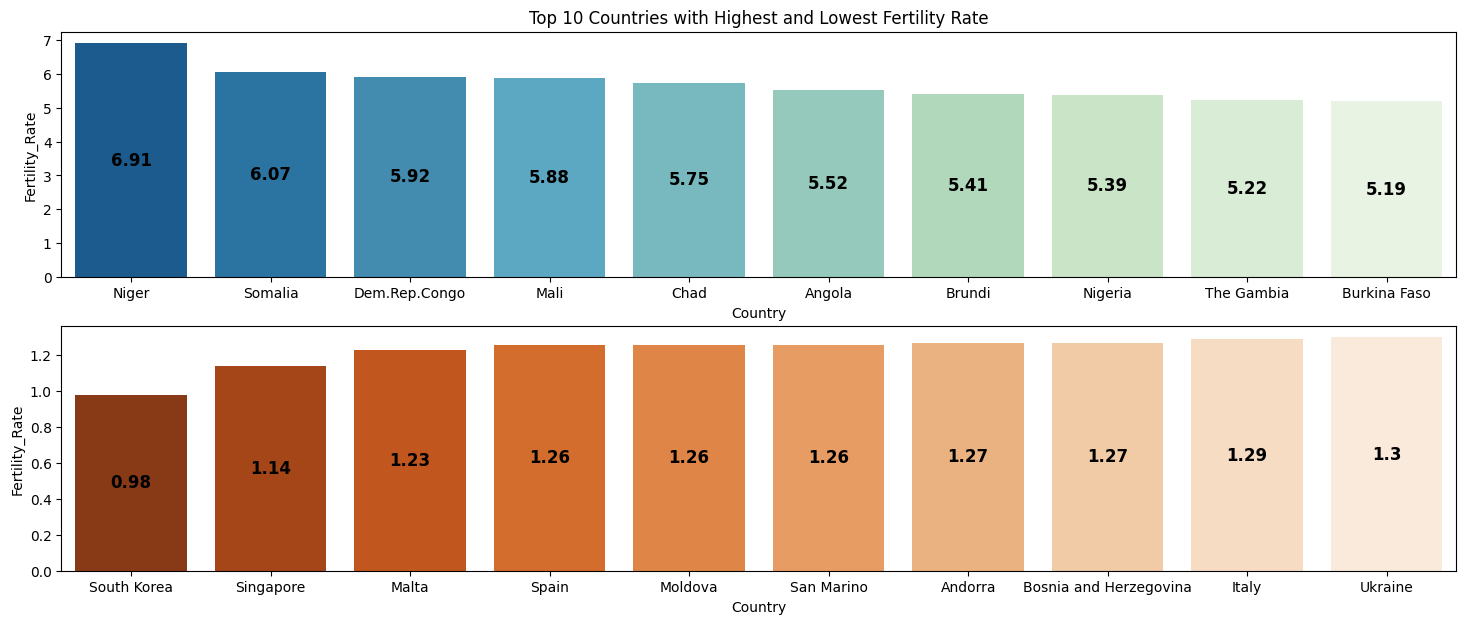

In [44]:
fig, axes = plt.subplots(2,1, figsize=(18,7))

top_fr = data.sort_values(by='Fertility_Rate', ascending=False)[:10]
sns.barplot(data=top_fr, x='Country', y='Fertility_Rate', palette='GnBu_r', ax= axes[0])
axes[0].set_xticklabels(['Niger','Somalia','Dem.Rep.Congo','Mali','Chad','Angola','Brundi','Nigeria','The Gambia','Burkina Faso'], ha="center")
axes[0].bar_label(axes[0].containers[0], label_type='center', fontweight='bold', fontsize=12)
axes[0].set_title("Top 10 Countries with Highest and Lowest Fertility Rate")

bottom_fr = data.sort_values(by='Fertility_Rate')[:10]
sns.barplot(data=bottom_fr, x='Country', y='Fertility_Rate', palette='Oranges_r', ax= axes[1])
axes[1].bar_label(axes[1].containers[0], label_type='center', fontweight='bold', fontsize=12)

plt.show()

All of the top 10 countries with the highest birth rates are situated in Africa. Monaco holds the distinction of having the lowest birth rate, and South Korea follows as the second country with the lowest birth rate. For a more comprehensive understanding of these figures, a bar plot depicting fertility rates is available. It is noteworthy that countries with the highest birth rates also exhibit the highest fertility rates. However, there is a distinction between low birth rates and low fertility rates. South Korea stands out with the lowest fertility rate at 0.98, indicating that, on average, a single woman may not give birth to a baby during her lifetime. This is a significant concern, especially when compared to other countries with low fertility rates, where at least one child is expected to be born to a woman during her lifetime.

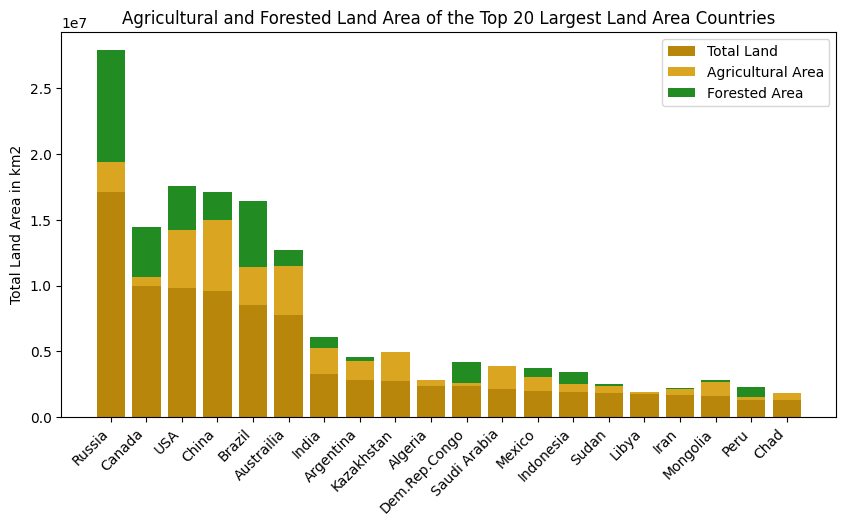

In [45]:
land_use = data.sort_values(by='Land_Area(km2)', ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10,5))

agri_land = land_use['Land_Area(km2)'] * (land_use['Agricultural_Land(%)']/100)
forest_land = land_use['Land_Area(km2)'] * (land_use['Forested_Area(%)']/100)

ax.bar(land_use['Country'], land_use['Land_Area(km2)'], color='darkgoldenrod')
ax.bar(land_use['Country'], agri_land, bottom=land_use['Land_Area(km2)'], color='goldenrod')
ax.bar(land_use['Country'], forest_land, bottom=land_use['Land_Area(km2)']+ agri_land, color='forestgreen')

ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(0,20))
ax.set_xticklabels(['Russia','Canada','USA','China','Brazil','Austrailia','India','Argentina','Kazakhstan','Algeria','Dem.Rep.Congo',
                    'Saudi Arabia','Mexico','Indonesia','Sudan','Libya','Iran','Mongolia','Peru','Chad'], ha='right')

ax.set_ylabel("Total Land Area in km2")
ax.set_title("Agricultural and Forested Land Area of the Top 20 Largest Land Area Countries")
plt.legend(['Total Land','Agricultural Area', 'Forested Area'])

plt.show()

In the bar graph provided above, Russia holds the top position for both the largest land area and forested area. Canada follows closely with the second-largest land area, but it has a comparatively smaller size of agricultural land. The United States stands out by having a substantial amount of both forested and agricultural areas.

On the other hand, countries such as Kazakhstan, Algeria, Saudi Arabia, Libya, and Chad exhibit no indications of forested areas, underscoring the absence or very limited presence of forests in these regions.

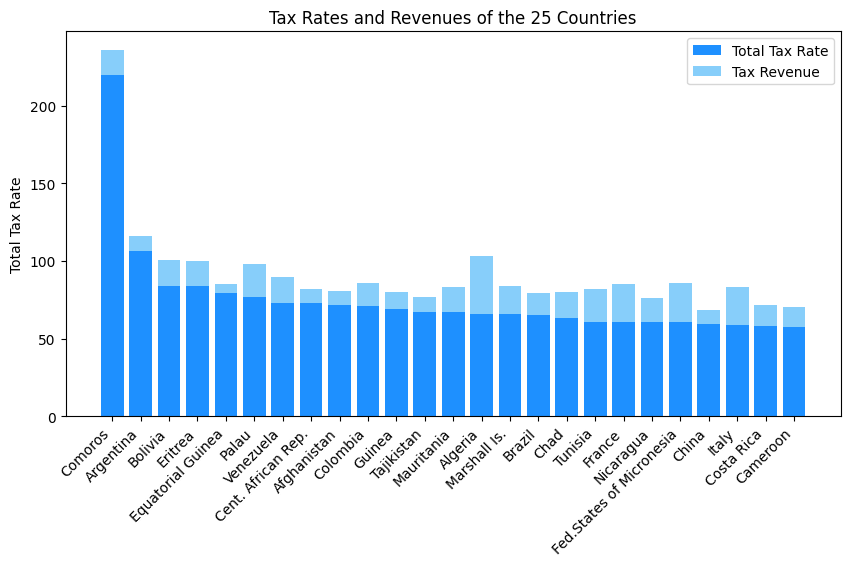

In [46]:
tax = data.sort_values(by='Total_Tax_Rate(%)', ascending=False)[:25]

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(tax['Country'], tax['Total_Tax_Rate(%)'], color='dodgerblue')
ax.bar(tax['Country'], tax['Tax_Revenue(%)'], bottom=tax['Total_Tax_Rate(%)'], color='lightskyblue')

ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(range(0,25))
ax.set_xticklabels(['Comoros', 'Argentina', 'Bolivia', 'Eritrea', 'Equatorial Guinea',
       'Palau', 'Venezuela', 'Cent. African Rep.', 'Afghanistan',
       'Colombia', 'Guinea', 'Tajikistan', 'Mauritania', 'Algeria',
       'Marshall Is.', 'Brazil', 'Chad', 'Tunisia', 'France',
       'Nicaragua', 'Fed.States of Micronesia', 'China', 'Italy',
       'Costa Rica', 'Cameroon'], ha='right')

ax.set_ylabel("Total Tax Rate")
ax.set_title("Tax Rates and Revenues of the 25 Countries")
plt.legend(['Total Tax Rate','Tax Revenue'])

plt.show()

The plot above illustrates that Comoros has the highest tax rate among 195 countries. What stands out is the notable difference, as Comoros's tax rate is nearly double that of the second-ranked country, Argentina. Additionally, Algeria exhibits a noteworthy situation where it has a high tax revenue compared to its tax rate.

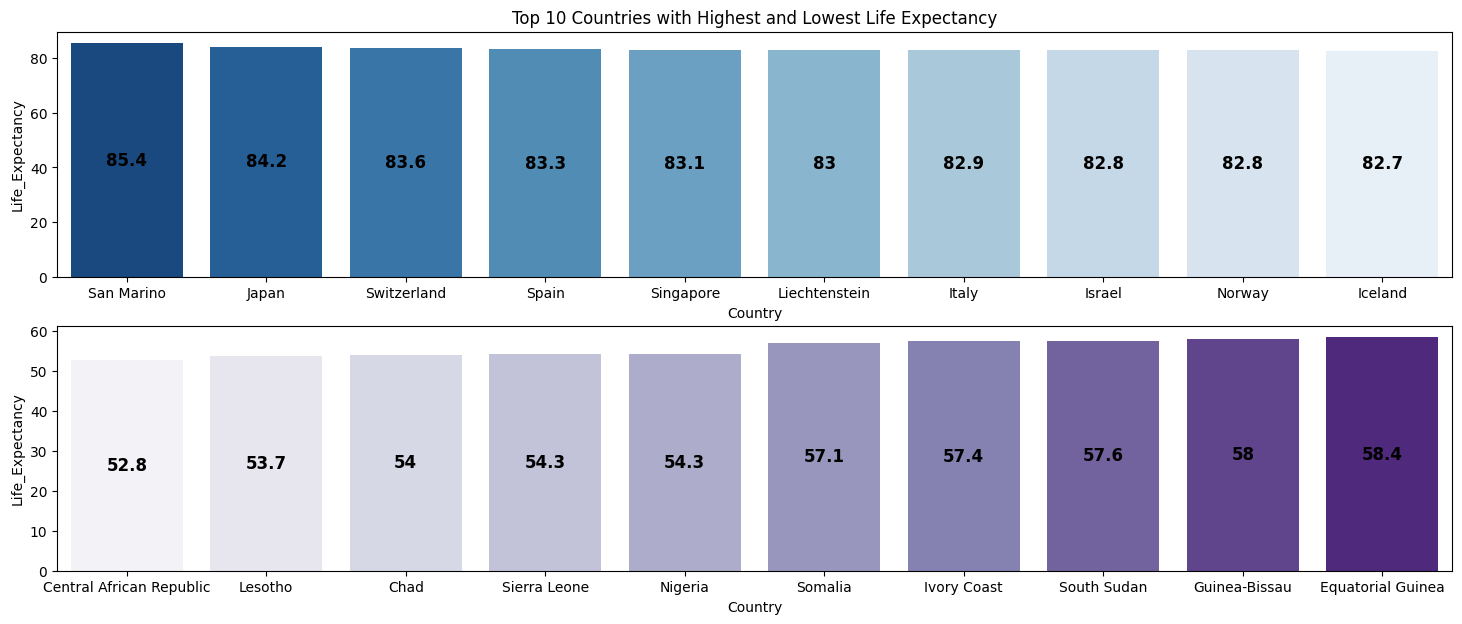

In [47]:
fig, axes = plt.subplots(2,1, figsize=(18,7))

top_le = data.sort_values(by='Life_Expectancy', ascending=False)[:10]
sns.barplot(data=top_le, x='Country', y='Life_Expectancy', palette='Blues_r', ax= axes[0])
axes[0].bar_label(axes[0].containers[0], label_type='center', fontweight='bold', fontsize=12)
axes[0].set_title("Top 10 Countries with Highest and Lowest Life Expectancy")

bottom_le = data.sort_values(by='Life_Expectancy')[:10]
sns.barplot(data=bottom_le, x='Country', y='Life_Expectancy', palette='Purples', ax= axes[1])
axes[1].bar_label(axes[1].containers[0], label_type='center', fontweight='bold', fontsize=12)

plt.show()

The top 10 countries with the highest life expectancy anticipate living beyond the age of 80, highlighting a significantly long lifespan. Conversely, the top 10 countries with the lowest life expectancy project a lifespan under 60 years, underscoring considerable disparities in life expectancy levels.

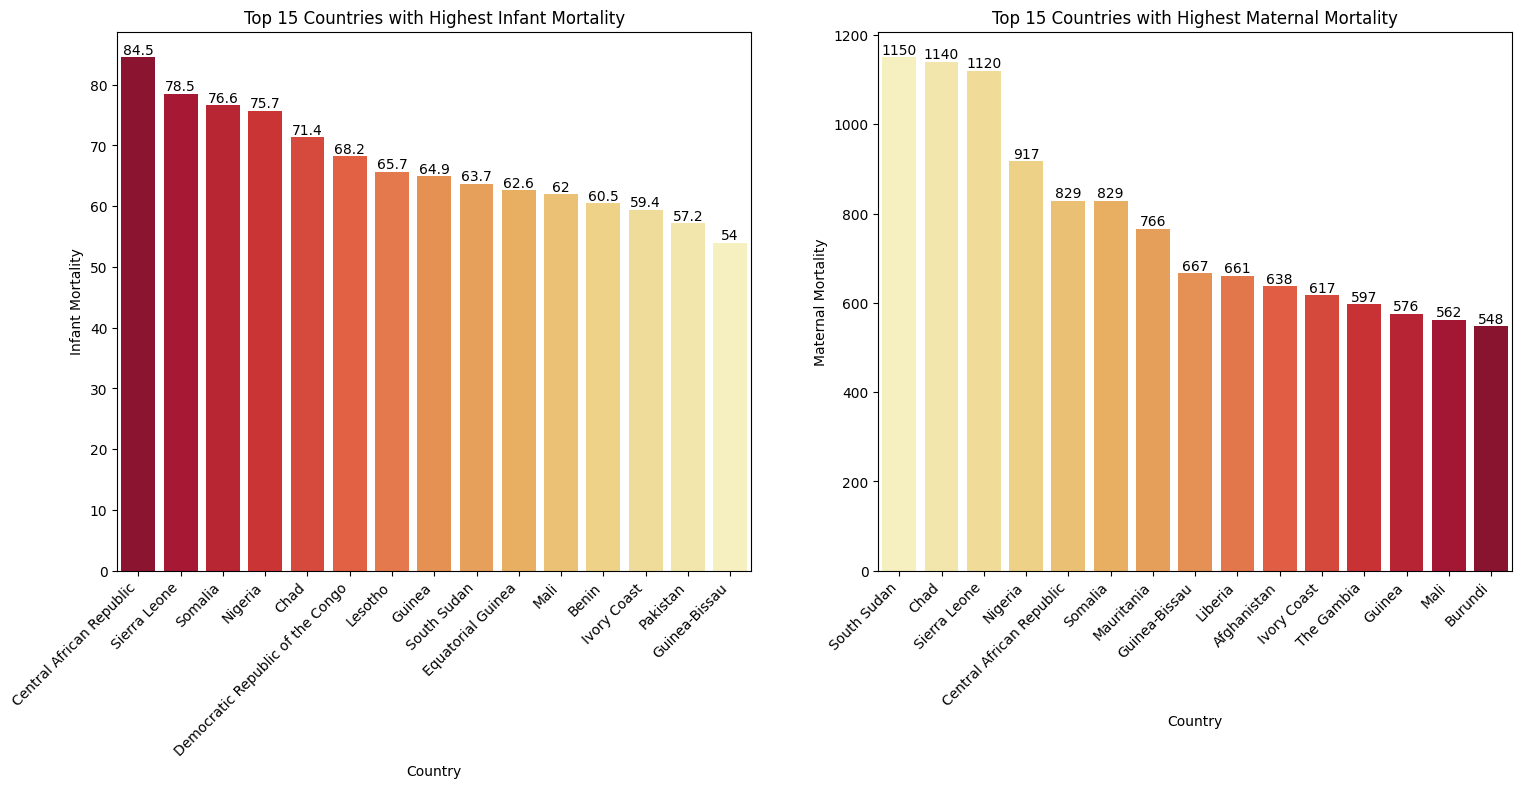

In [48]:
fig, axes = plt.subplots(1,2, figsize=(18,7))

high_infant_mort = data.sort_values(by='Infant_Mortality', ascending=False)[:15]

sns.barplot(high_infant_mort, x="Country", y="Infant_Mortality", palette='YlOrRd_r', ax=axes[0])
axes[0].bar_label(axes[0].containers[0], fontsize=10)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_xticklabels(labels=high_infant_mort['Country'], ha='right')
axes[0].set_ylabel("Infant Mortality")
axes[0].set_title("Top 15 Countries with Highest Infant Mortality")

high_mat_mort = data.sort_values(by='Maternal_mortality_ratio', ascending=False)[:15]

ax = sns.barplot(high_mat_mort, x="Country", y="Maternal_mortality_ratio", palette='YlOrRd', ax=axes[1])
axes[1].bar_label(axes[1].containers[0], fontsize=10)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].set_xticklabels(labels=high_mat_mort['Country'], ha='right')
axes[1].set_ylabel("Maternal Mortality")
axes[1].set_title("Top 15 Countries with Highest Maternal Mortality")

plt.show()

The graph above depicts the top 15 countries with the highest infant and maternal mortality rates. It is concerning to observe that numerous African countries experience high infant mortality rates. Notably, the only non-African country in this ranking is Pakistan. Additionally, all of the top 15 countries with the highest maternal mortality rates are located in Africa.

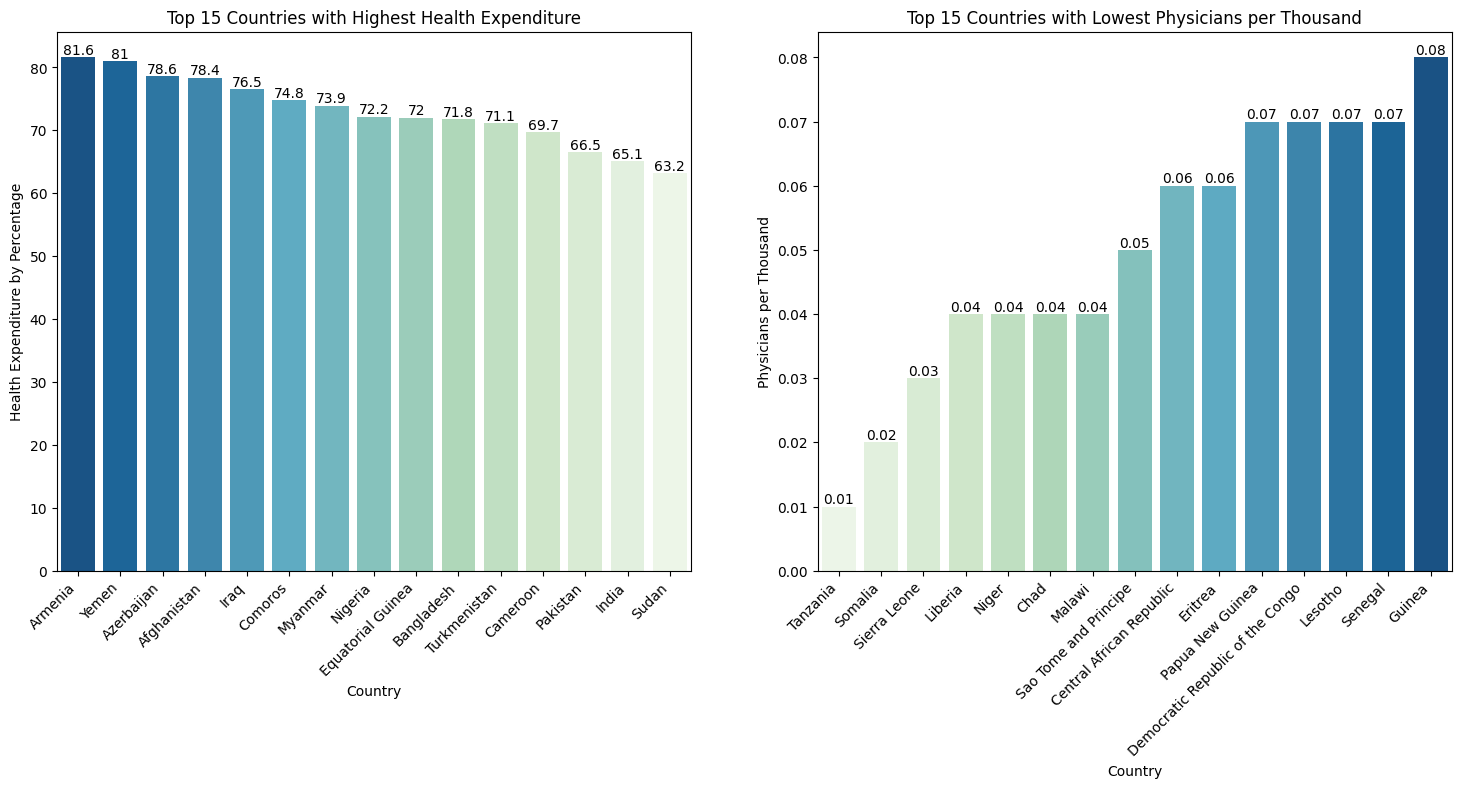

In [49]:
fig, axes = plt.subplots(1,2, figsize=(18,7))

high_health_exp = data.sort_values(by='Health_Expenditure(%)', ascending=False)[:15]

sns.barplot(high_health_exp, x="Country", y="Health_Expenditure(%)", palette='GnBu_r', ax=axes[0])
axes[0].bar_label(axes[0].containers[0], fontsize=10)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_xticklabels(labels=high_health_exp['Country'], ha='right')
axes[0].set_ylabel("Health Expenditure by Percentage")
axes[0].set_title("Top 15 Countries with Highest Health Expenditure")

low_phys = data.sort_values(by='Physicians_per_thousand')[:15]

ax = sns.barplot(low_phys, x="Country", y="Physicians_per_thousand", palette='GnBu', ax=axes[1])
axes[1].bar_label(axes[1].containers[0], fontsize=10)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].set_xticklabels(labels=low_phys['Country'], ha='right')
axes[1].set_ylabel("Physicians per Thousand")
axes[1].set_title("Top 15 Countries with Lowest Physicians per Thousand")

plt.show()

The graph above illustrates countries with the highest health expenditure and those with the lowest physicians per thousand rates. Armenia claims the top spot for the highest health expenditure, while Tanzania leads in having the lowest physician rate. This graph highlights that health expenditure may not be the sole factor influencing the number of doctors available. Interestingly, many countries identified in the earlier graph concerning infant and maternal mortality rates also appear in the low physician graph, indicating potential challenges in providing adequate healthcare for infants and mothers in those regions.

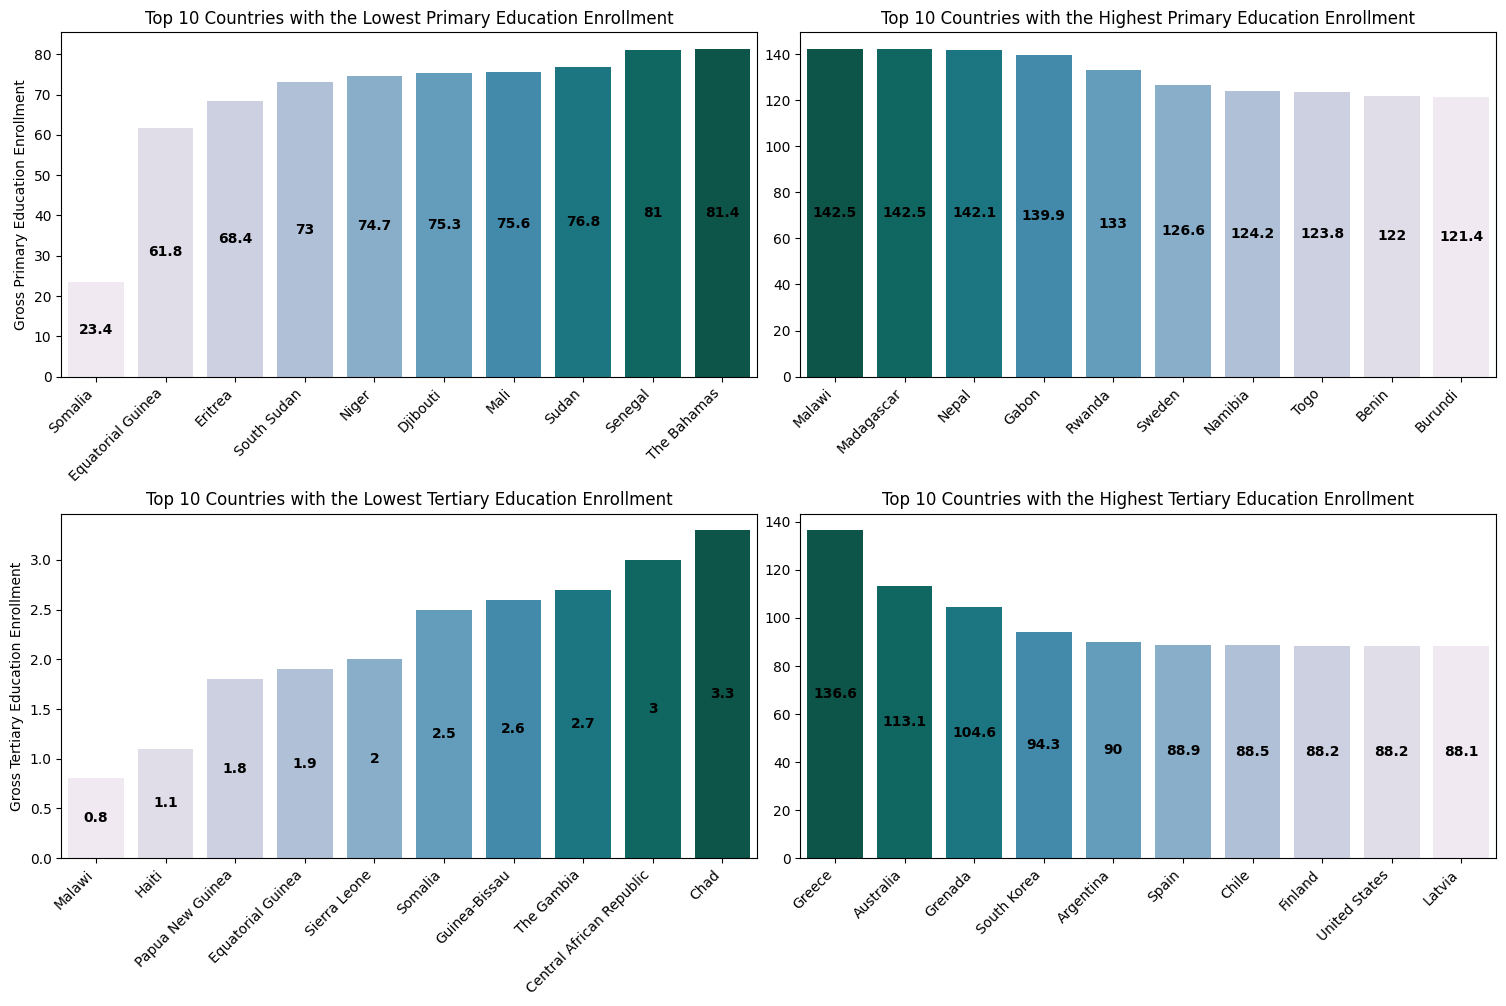

In [50]:
fig, axes = plt.subplots(2,2, figsize=(15,10))

prim_edu_low = data.sort_values(by='Gross_primary_edu_enrollment(%)')[:10]
prim_edu_high = data.sort_values(by='Gross_primary_edu_enrollment(%)', ascending=False)[:10]

sns.barplot(prim_edu_low, x="Country", y="Gross_primary_edu_enrollment(%)", palette='PuBuGn', ax=axes[0,0])
axes[0,0].bar_label(axes[0,0].containers[0], fontsize=10, label_type='center', fontweight='bold')
axes[0,0].tick_params(axis='x', labelrotation=45)
axes[0,0].set_xticklabels(labels=prim_edu_low['Country'], ha='right')
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Gross Primary Education Enrollment")
axes[0,0].set_title("Top 10 Countries with the Lowest Primary Education Enrollment")

sns.barplot(prim_edu_high, x="Country", y="Gross_primary_edu_enrollment(%)", palette='PuBuGn_r', ax=axes[0,1])
axes[0,1].bar_label(axes[0,1].containers[0], fontsize=10, label_type='center', fontweight='bold')
axes[0,1].tick_params(axis='x', labelrotation=45)
axes[0,1].set_xticklabels(labels=prim_edu_high['Country'], ha='right')
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Top 10 Countries with the Highest Primary Education Enrollment")

ter_edu_low = data.sort_values(by='Gross_tertiary_edu_enrollment(%)')[:10]
ter_edu_high = data.sort_values(by='Gross_tertiary_edu_enrollment(%)', ascending=False)[:10]

sns.barplot(ter_edu_low, x="Country", y="Gross_tertiary_edu_enrollment(%)", palette='PuBuGn', ax=axes[1,0])
axes[1,0].bar_label(axes[1,0].containers[0], fontsize=10, label_type='center', fontweight='bold')
axes[1,0].tick_params(axis='x', labelrotation=45)
axes[1,0].set_xticklabels(labels=ter_edu_low['Country'], ha='right')
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("Gross Tertiary Education Enrollment")
axes[1,0].set_title("Top 10 Countries with the Lowest Tertiary Education Enrollment")

sns.barplot(ter_edu_high, x="Country", y="Gross_tertiary_edu_enrollment(%)", palette='PuBuGn_r', ax=axes[1,1])
axes[1,1].bar_label(axes[1,1].containers[0], fontsize=10, label_type='center', fontweight='bold')
axes[1,1].tick_params(axis='x', labelrotation=45)
axes[1,1].set_xticklabels(labels=ter_edu_high['Country'], ha='right')
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Top 10 Countries with the Highest Tertiary Education Enrollment")

plt.tight_layout(pad=0.5)
plt.show()

The graph above displays the enrollment rates for primary and tertiary education. Notably, Somalia ranks as the country with the lowest primary education enrollment, holding the first position with less than 30 percent. This is a cause for concern, especially when compared to the second-lowest country, which boasts a significantly higher enrollment rate at 61.8 percent. In contrast, Malawi, Madagascar, and Nepal stand out for having the highest primary education enrollment rates.

Shifting to tertiary education, countries such as Malawi, Haiti, and Papua New Guinea exhibit the lowest enrollment rates. The graph suggests that, for Malawi, there is a distinct emphasis on primary education, with a comparatively lower focus on higher education. On the other hand, countries like Greece, Australia, Grenada, South Korea, and Argentina demonstrate some of the highest tertiary education enrollment rates. The United States is positioned at 9th place in this ranking.

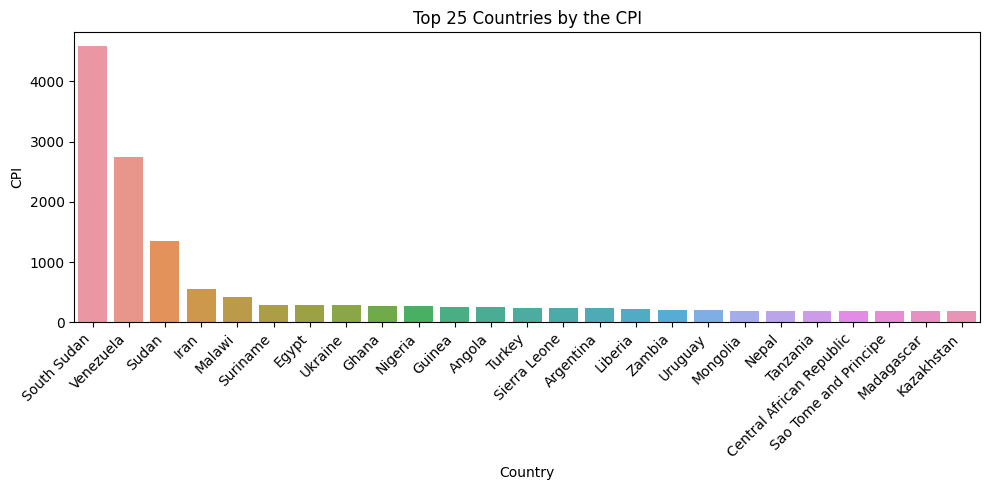

In [51]:
create_barplot_top(data, 'Country', 'CPI', 25)

- CPI: Consumer Price Index, a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.

South Sudan registers the highest Consumer Price Index (CPI), signifying an upward trend in the general level of prices for goods and services within its economy.

### Correlation Heatmap

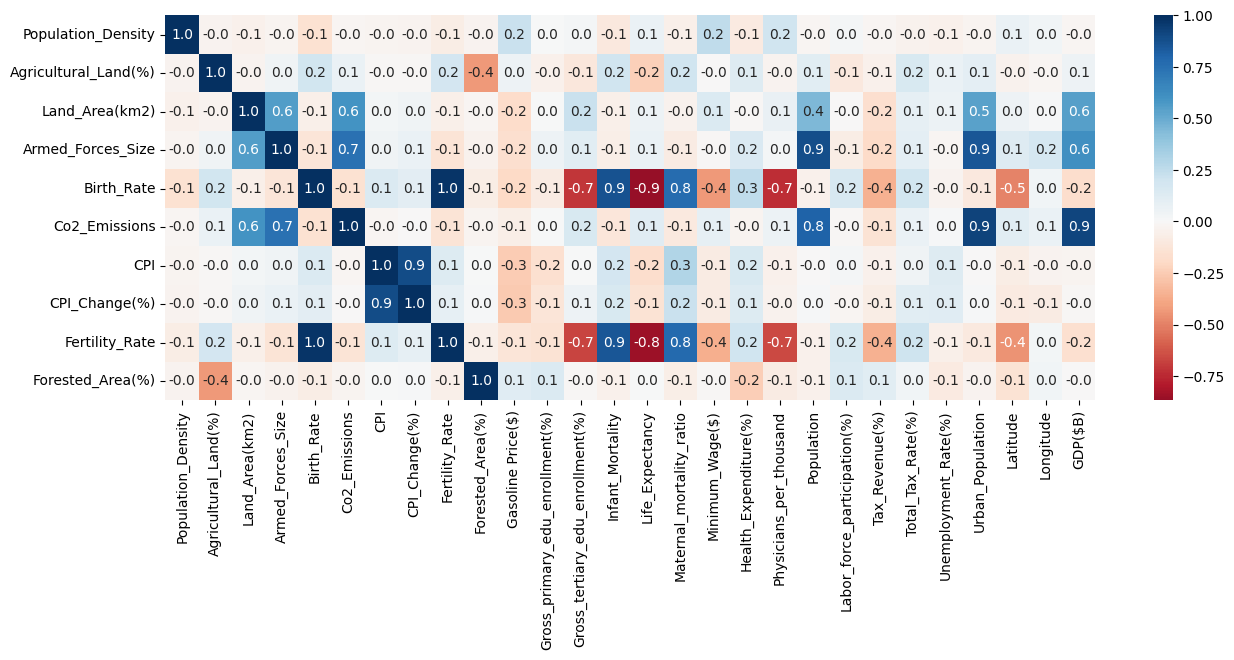

In [52]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True)[:10], cmap='RdBu', center=0, annot=True, fmt='.1f')
plt.show()

- Population Density exhibits almost no correlation with the listed features.
- Agricultural Land displays a negative correlation with Forested Area.
- Land Area demonstrates a positive correlation with Armed Forces Size, CO2 Emissions, GDP, Population, and Urban Population.
- Armed Forces Size reveals a positive correlation with Land Area, CO2 Emissions, GDP, Population, and Urban Population.
- Birth Rate demonstrates a consistently positive correlation with Fertility Rate. It also shows positive correlations with Infant Mortality and Maternal Mortality Ratio. Conversely, it exhibits a negative correlation with Gross Tertiary Education Enrollment, Life Expectancy, Physicians per Thousand, and Latitude.
    - This suggests that individuals may be less inclined to have children if life expectancy is perceived to be lower. Additionally, exploring the reasons behind the negative correlation between birth rate and latitude could provide meaningful insights.
- CO2 Emissions show generally high correlations with population-related features and GDP.
- CPI is highly correlated with the CPI Change rate.
- Fertility Rate exhibits mostly the same correlations as those associated with the birth rate features.

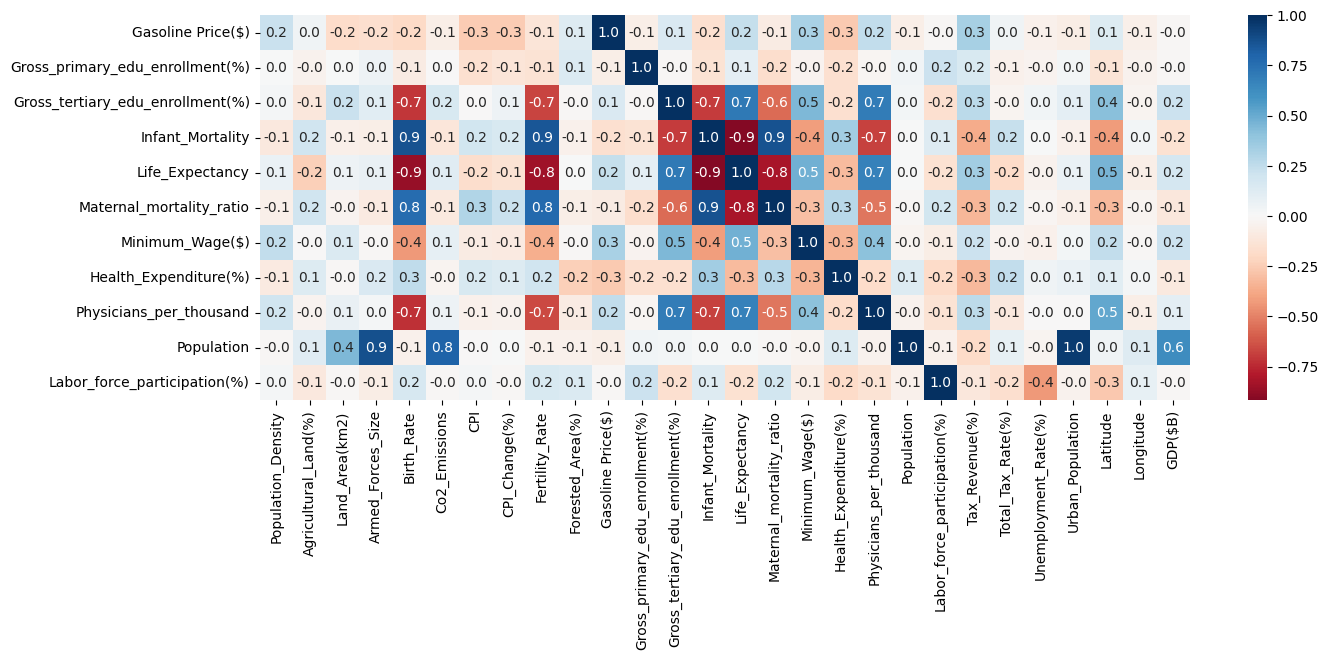

In [53]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True)[10:21], cmap='RdBu', center=0, annot=True, fmt='.1f')
plt.show()

- Gasoline Price shows very low correlations with the other features.
- Gross Primary Education Enrollment exhibits low correlations with the other features.
- Gross Tertiary Education Enrollment displays negative correlations with Birth Rate, Fertility Rate, Infant Mortality, and Maternal Mortality Ratio. Conversely, it has positive correlations with Life Expectancy, Minimum Wages, and Physicians per Thousand.
    - A lower birth rate and fertility rate coincide with higher tertiary education enrollment, suggesting that families with fewer children tend to prioritize higher education. Additionally, factors promoting a safe environment for both mothers and children, reflected in life expectancy and higher minimum wages, contribute to increased tertiary education enrollment.
- Health Expenditure demonstrates low correlations with the other features.
- Physicians per Thousand shows positive and negative correlations similar to the tertiary education enrollment feature, except it has a somewhat positive correlation with Latitude.
- Population has a positive correlation with Armed Forces Size, CO2 Emissions, and GDP.
    - This correlation aligns with the notion that a larger population provides a larger pool of potential recruits for the armed forces. Moreover, higher population numbers are often associated with increased carbon emissions and economic productivity, contributing to a positive correlation with GDP.

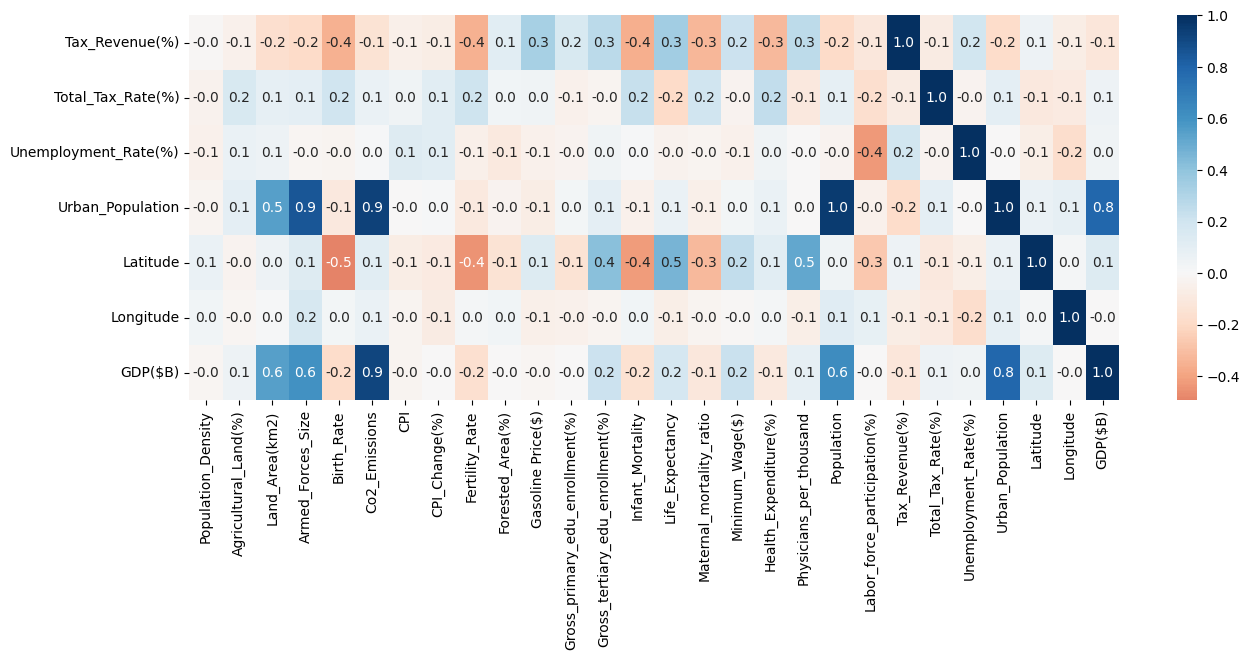

In [54]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True)[21:], cmap='RdBu', center=0, annot=True, fmt='.1f')
plt.show()

- Tax Revenue, Total Tax Rate, and Unemployment Rate exhibit low correlations with other features.
- Urban Population shows a positive correlation with Armed Forces Size, CO2 Emissions, and GDP.
- Latitude demonstrates a negative correlation with Birth Rate and a positive correlation with Physicians per Thousand.
- Longitude indicates close to zero correlations with all the features.
- GDP is positively correlated with Land Area, Armed Forces Size, CO2 Emissions, Population, and Urban Population.

### Scatter Plot and Histogram

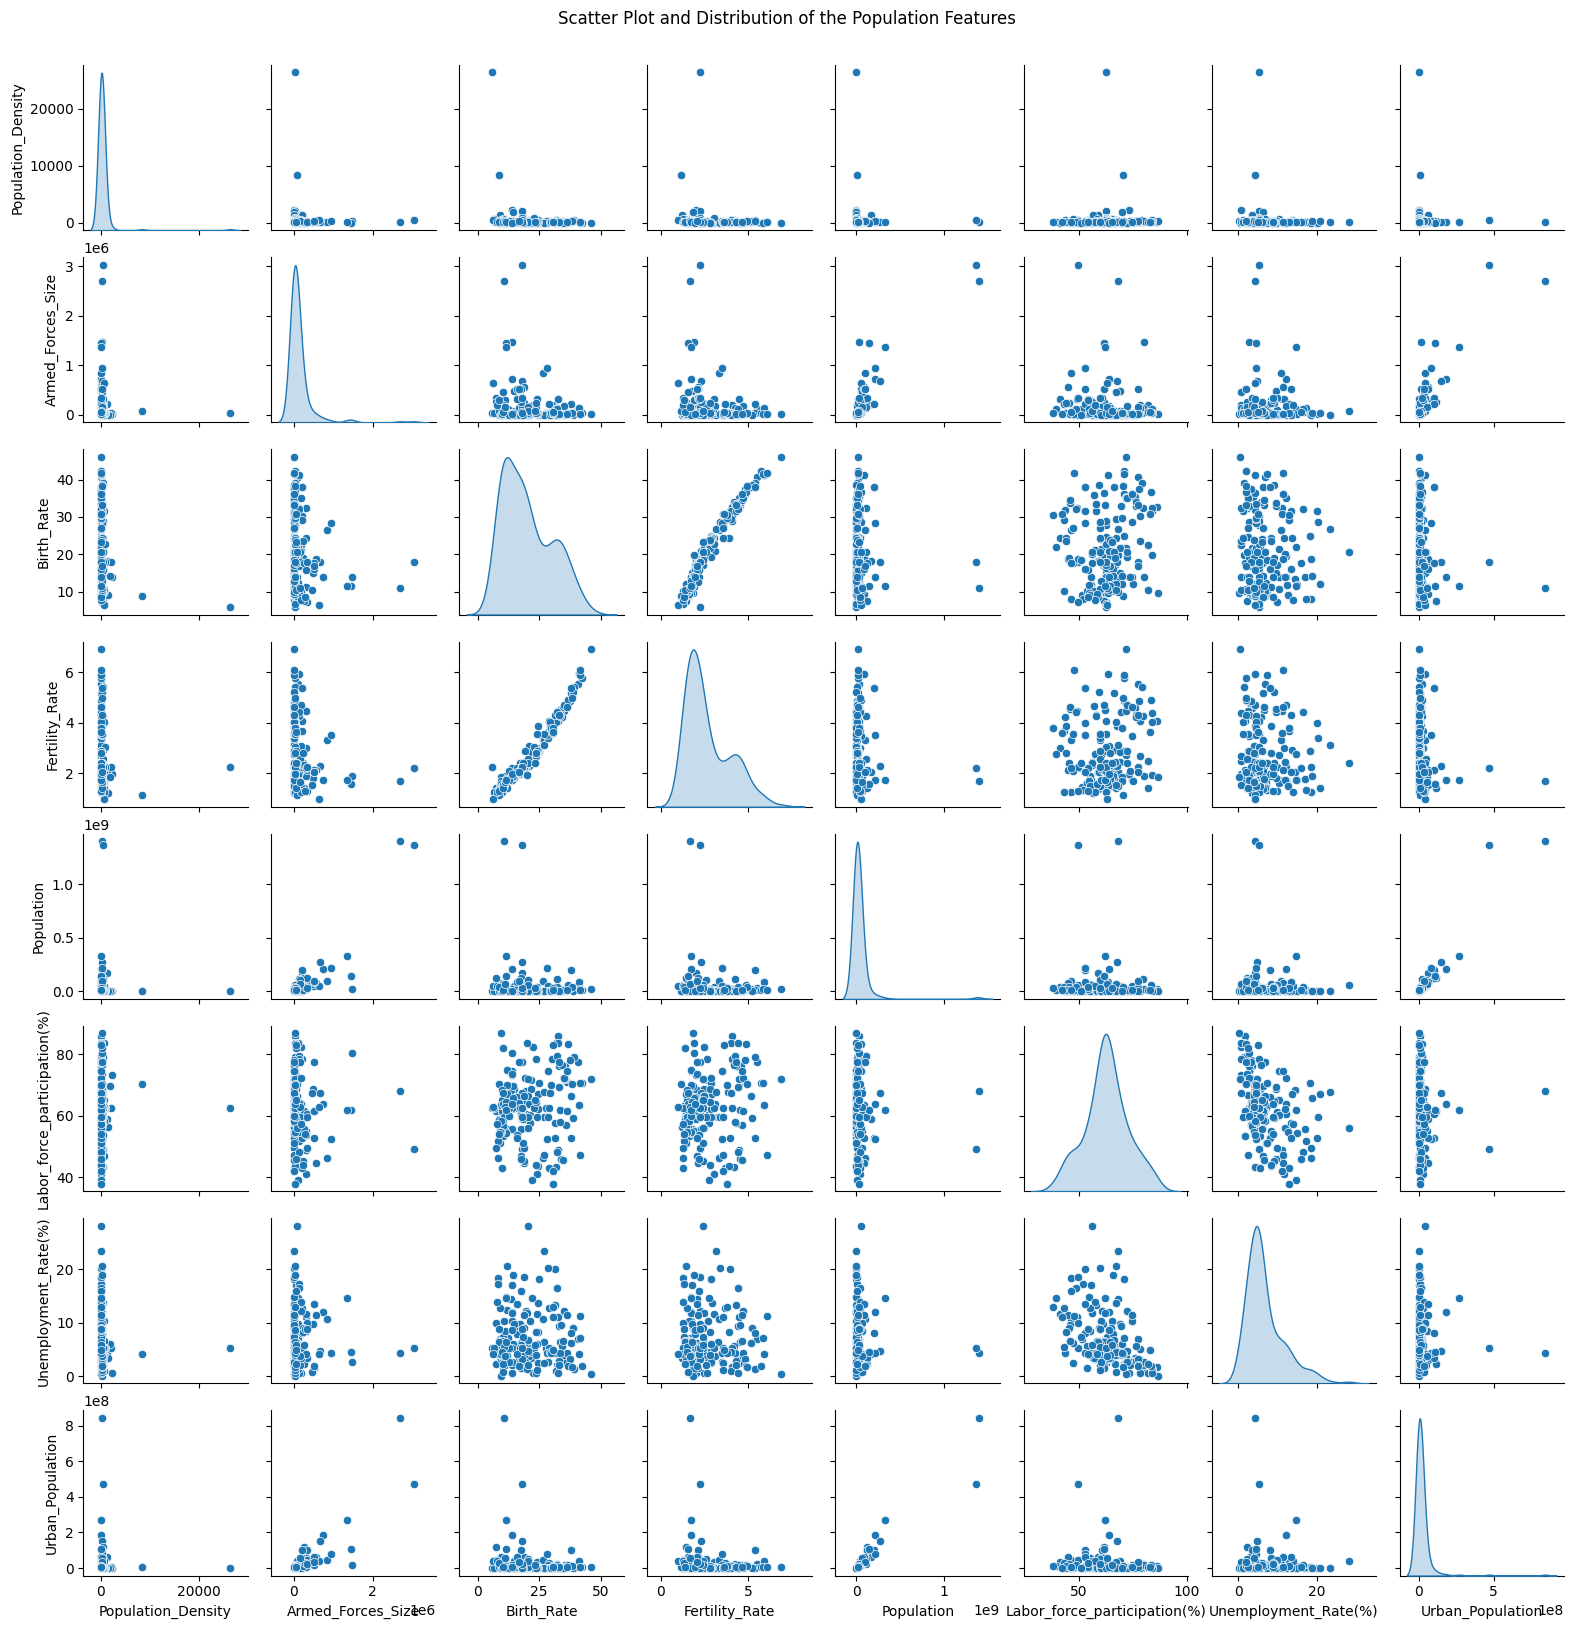

In [55]:
population_rel = data[['Population_Density','Armed_Forces_Size','Birth_Rate','Fertility_Rate','Population','Labor_force_participation(%)','Unemployment_Rate(%)','Urban_Population']]
g = sns.pairplot(population_rel, diag_kind='kde', corner=False, height=2)
g.fig.suptitle("Scatter Plot and Distribution of the Population Features", y=1.02)
plt.show()

From the graph presented above, it is evident that the Labor Force Participation feature follows a normal distribution. Additionally, Birth Rate and Fertility Rate exhibit similar distributions, displaying a linear relationship. Conversely, the remaining features depict positive skewed distributions with extreme values skewed toward the right. Notably, Population demonstrates a linear relationship with Armed Forces Size and Urban Population features.

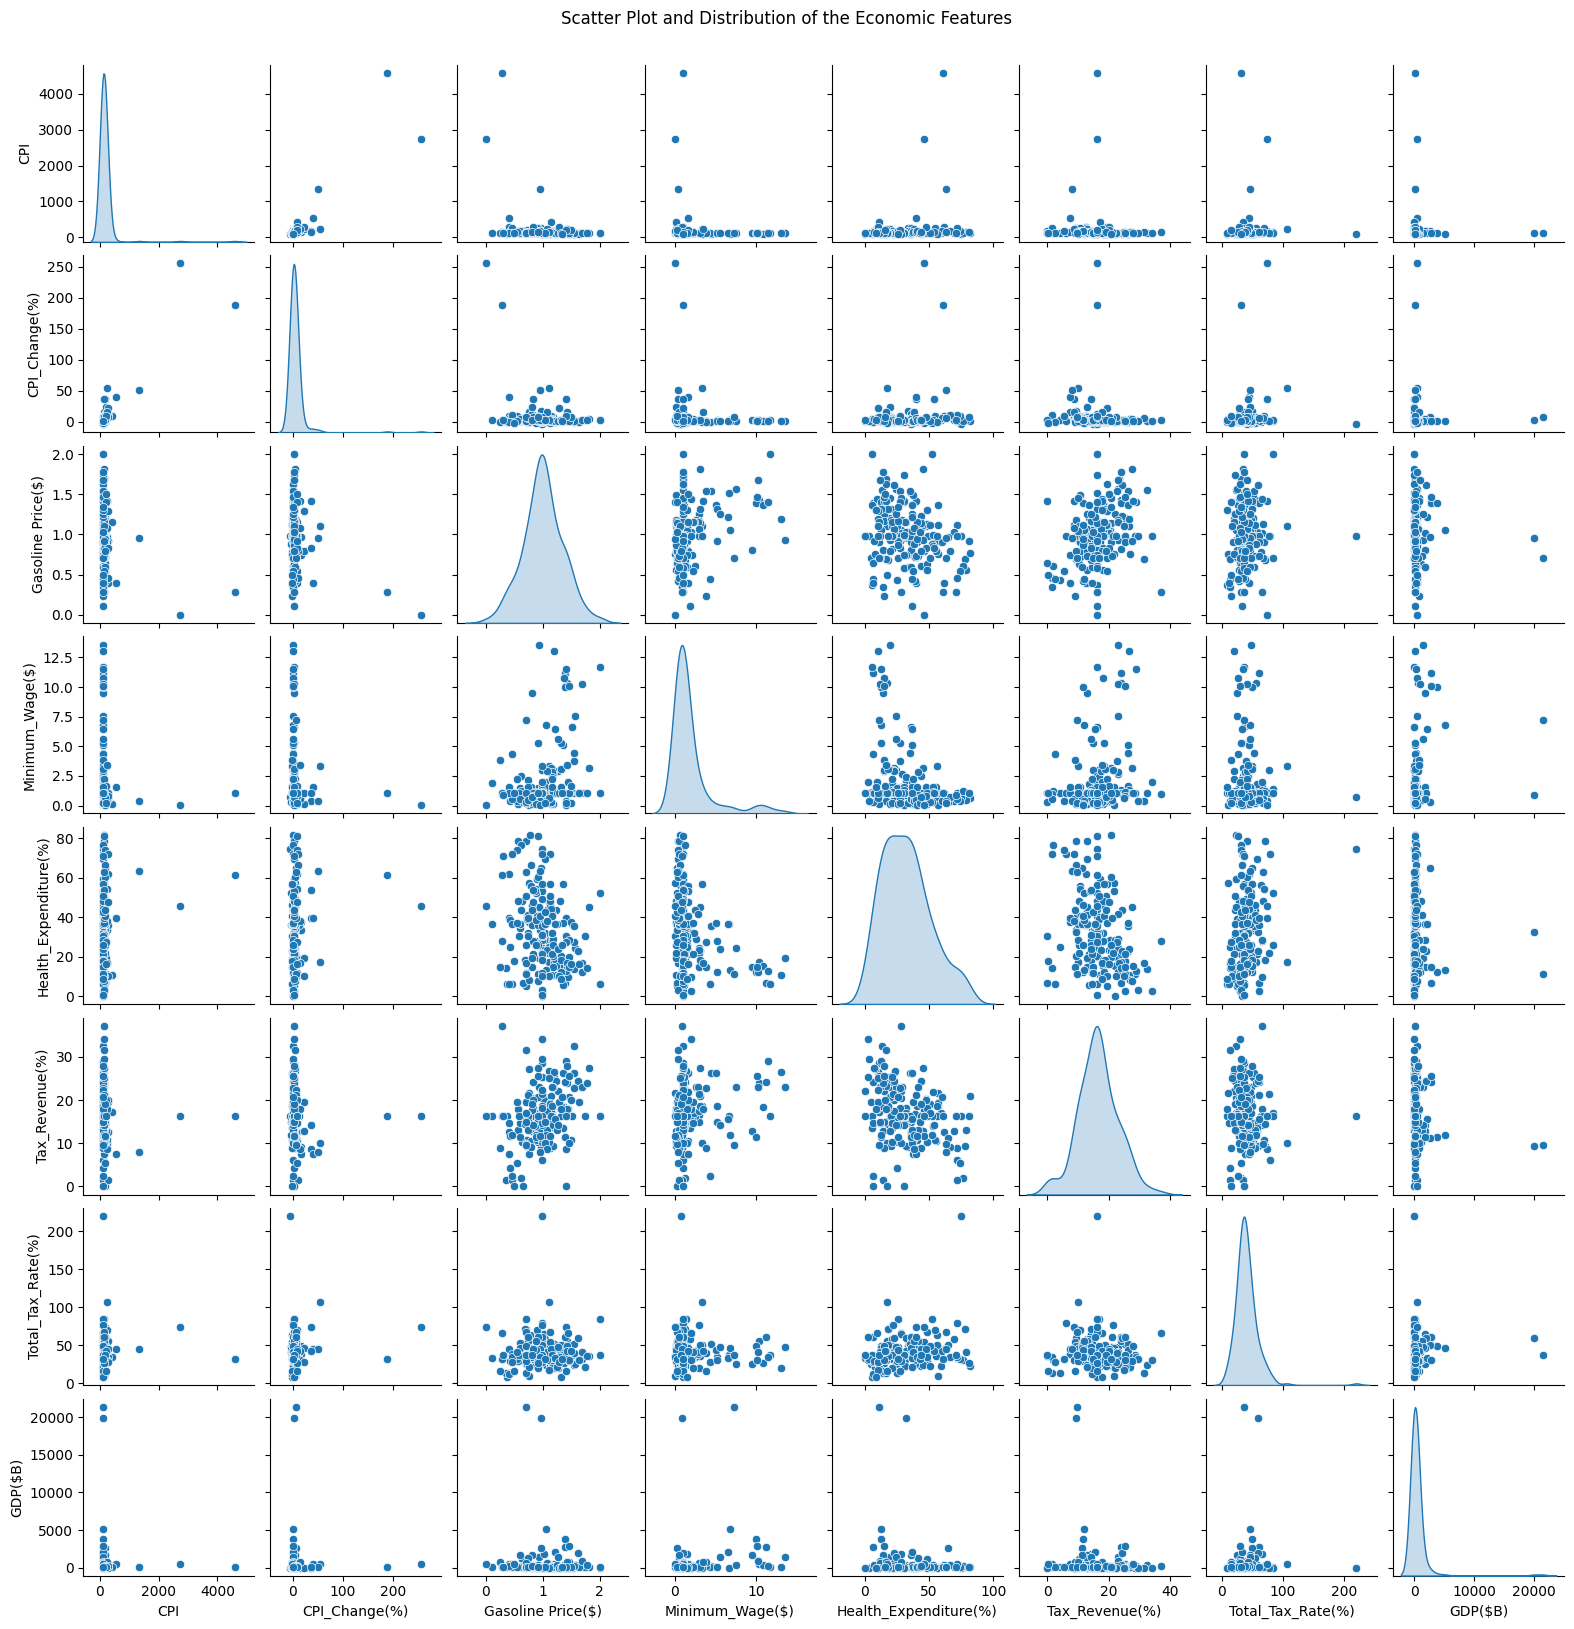

In [56]:
econ_rel = data[['CPI','CPI_Change(%)','Gasoline Price($)','Minimum_Wage($)','Health_Expenditure(%)','Tax_Revenue(%)','Total_Tax_Rate(%)','GDP($B)']]
g = sns.pairplot(econ_rel, diag_kind='kde', height=2)
g.fig.suptitle("Scatter Plot and Distribution of the Economic Features", y=1.02)
plt.show()

The graph above illustrates linear relationships between CPI and CPI Change. As depicted in the plot, Gasoline Price, Health Expenditure, and Tax Revenue exhibit normal distributions, while the remaining features display positively skewed distributions.

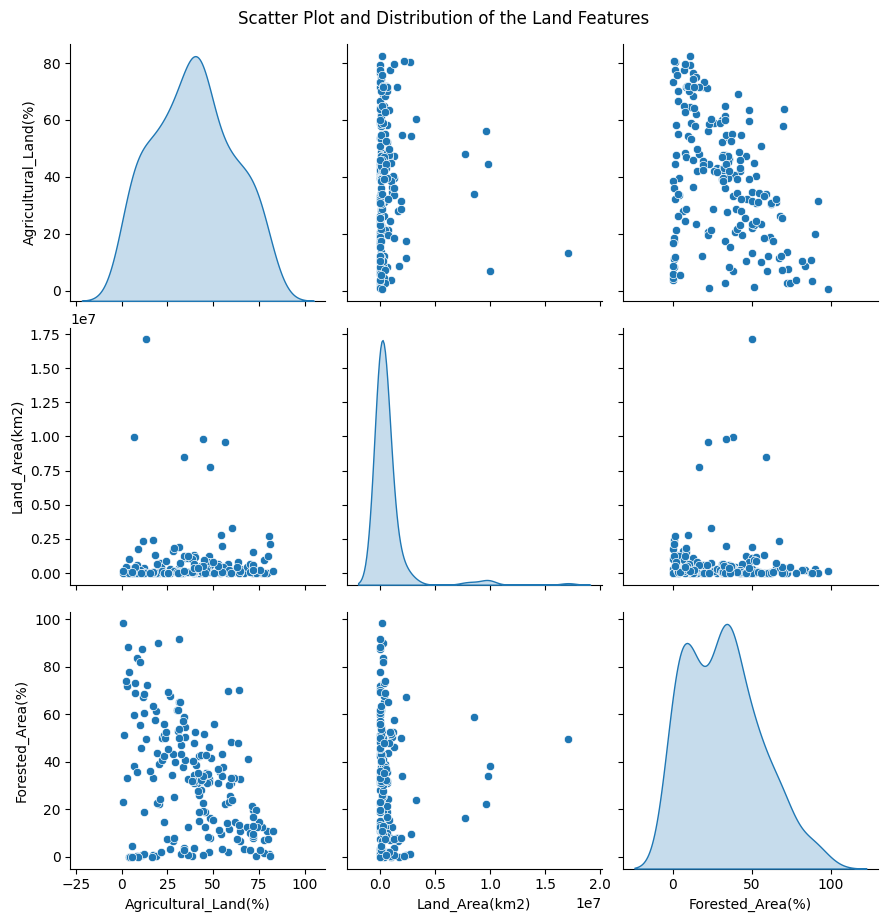

In [57]:
land_rel = data[['Agricultural_Land(%)','Land_Area(km2)','Forested_Area(%)']]
g = sns.pairplot(land_rel, diag_kind='kde', height=3)
g.fig.suptitle("Scatter Plot and Distribution of the Land Features", y=1.02)
plt.show()

The graph above indicates the absence of linear relationships with the land-related features. Agricultural Land demonstrates a normal distribution, Forested Area exhibits a very small bi-modal distribution, and Land Area shows a positively skewed distribution.

## Data Normalization and Scaling

In [58]:
scaler = MinMaxScaler()

numerical_data = data.select_dtypes('number')
scaled_data = scaler.fit_transform(numerical_data)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)

In [59]:
scaled_df.describe()

,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Fertility_Rate,Forested_Area(%),Gasoline Price($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude,GDP($B)
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.013471,0.469937,0.040162,0.047340,0.354537,0.017371,0.019121,0.041125,0.286994,0.325685,0.500077,0.663922,0.270598,0.237150,0.598694,0.131256,0.141307,0.397637,0.215958,0.028063,0.506352,0.444555,0.154062,0.236655,0.025918,0.565775,0.552922,0.022060
std,0.075295,0.260813,0.112122,0.118378,0.243868,0.083301,0.084857,0.090479,0.212775,0.237621,0.174697,0.108414,0.209046,0.232073,0.224847,0.197413,0.195023,0.231291,0.196803,0.103551,0.204420,0.174167,0.094191,0.172495,0.088388,0.226131,0.188414,0.100870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001272,0.268902,0.001430,0.004124,0.138128,0.000264,0.003443,0.020640,0.123103,0.116480,0.395000,0.637699,0.087261,0.056558,0.449387,0.012631,0.038292,0.214988,0.041617,0.001433,0.394467,0.337366,0.108223,0.124600,0.001439,0.427658,0.474263,0.000393
50%,0.003304,0.475610,0.006990,0.010228,0.299900,0.001242,0.005867,0.025463,0.213322,0.325534,0.490000,0.664568,0.223859,0.151625,0.625767,0.044425,0.076215,0.374693,0.172414,0.006314,0.501025,0.438172,0.137996,0.187611,0.005543,0.548729,0.555217,0.001603
75%,0.008145,0.661585,0.030444,0.040581,0.561100,0.006260,0.012615,0.031057,0.435919,0.482706,0.592500,0.706549,0.444035,0.362816,0.750000,0.150697,0.118925,0.535012,0.340666,0.020434,0.620902,0.545699,0.185728,0.311499,0.017316,0.765198,0.631950,0.010753
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data['CPI_Change(%)'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95])

count    195.000000
mean       6.359487
std       23.452045
min       -4.300000
25%        1.050000
50%        2.300000
75%        3.750000
80%        5.200000
85%        7.190000
90%        9.040000
95%       16.190000
max      254.900000
Name: CPI_Change(%), dtype: float64

In [62]:
data['CPI_Change(%)'] = np.where((data['CPI_Change(%)']>100), 100, data['CPI_Change(%)'])

In [63]:
data[data['CPI_Change(%)']==100]

,Country,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Currency_Code,Fertility_Rate,Forested_Area(%),Gasoline Price($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Official_Language,Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude,GDP($B)
163,South Sudan,18.0,39.6,644329.0,185000.0,35.01,1727.0,4583.71,100.0,SSP,4.70,32.0,0.28,73.0,31.2,63.7,57.6,1150.0,1.045,English,61.3,1.46,11062113.0,72.4,16.3,31.4,12.24,2201250.0,6.876992,31.306979,12.00
190,Venezuela,32.0,24.5,912050.0,343000.0,17.88,164175.0,2740.27,100.0,VED,2.27,52.7,0.00,97.2,79.3,21.4,72.1,125.0,0.010,Spanish,45.8,1.92,28515829.0,59.7,16.3,73.3,8.80,25162368.0,6.423750,-66.589730,482.36


I employed the MinMax scaler from the sklearn preprocessing library. While working with the data, I discovered that the CPI_Change(%) feature contained a significant outlier. Typically, I would remove such outliers from the dataset. However, given that the purpose of this dataset is for data analysis rather than building a predictive model, I opted to adjust the value of this outlier. This adjustment ensures that the normalization step proceeds without triggering warnings or errors, preventing the generation of NaN values.

In [64]:
skew_dict = {}

for column in scaled_df.columns:
    feature_skew = scaled_df[column].skew()
    skew_dict[column] = feature_skew
print(pd.Series(skew_dict))

Population_Density                  12.064621
Agricultural_Land(%)                 0.090036
Land_Area(km2)                       5.584113
Armed_Forces_Size                    5.463384
Birth_Rate                           0.607401
Co2_Emissions                        9.748339
CPI                                  9.770439
CPI_Change(%)                        8.727957
Fertility_Rate                       0.995748
Forested_Area(%)                     0.527978
Gasoline Price($)                    0.056183
Gross_primary_edu_enrollment(%)     -1.013791
Gross_tertiary_edu_enrollment(%)     0.684207
Infant_Mortality                     1.202615
Life_Expectancy                     -0.554072
Maternal_mortality_ratio             2.297342
Minimum_Wage($)                      2.665123
Health_Expenditure(%)                0.588201
Physicians_per_thousand              1.047851
Population                           8.411704
Labor_force_participation(%)        -0.007423
Tax_Revenue(%)                    

In [65]:
skew_series = pd.Series(skew_dict)
skewed_features = skew_series[skew_series > 0.5].index
skewed_features

Index(['Population_Density', 'Land_Area(km2)', 'Armed_Forces_Size',
       'Birth_Rate', 'Co2_Emissions', 'CPI', 'CPI_Change(%)', 'Fertility_Rate',
       'Forested_Area(%)', 'Gross_tertiary_edu_enrollment(%)',
       'Infant_Mortality', 'Maternal_mortality_ratio', 'Minimum_Wage($)',
       'Health_Expenditure(%)', 'Physicians_per_thousand', 'Population',
       'Total_Tax_Rate(%)', 'Unemployment_Rate(%)', 'Urban_Population',
       'GDP($B)'],
      dtype='object')

In [74]:
for column in scaled_df[skewed_features]:
    sqrt_skews = np.sqrt(scaled_df[column])
    scaled_df[column] = sqrt_skews

In [75]:
scaled_df

,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Fertility_Rate,Forested_Area(%),Gasoline Price($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude,GDP($B)
0,0.046930,0.701220,0.195310,0.326444,0.813494,0.029588,0.106504,0.159571,0.767159,0.146161,0.350,0.676742,0.256003,0.748042,0.358896,0.744316,0.175863,0.980147,0.179178,0.164974,0.223361,0.250000,0.547377,0.626631,0.107779,0.706944,0.687612,0.029817
1,0.062539,0.518293,0.041004,0.054491,0.382546,0.021387,0.066814,0.148293,0.328521,0.534658,0.680,0.701931,0.631757,0.277517,0.788344,0.106414,0.285898,0.834602,0.376162,0.045182,0.362705,0.500000,0.367642,0.660108,0.045462,0.775091,0.553034,0.026660
2,0.024649,0.204878,0.373226,0.323398,0.676344,0.123133,0.108021,0.155902,0.586527,0.090213,0.140,0.726280,0.610415,0.474373,0.733129,0.309546,0.263096,0.585450,0.450921,0.175505,0.065574,1.000000,0.523999,0.642895,0.193327,0.651163,0.500640,0.089055
3,0.078432,0.480488,0.005232,0.101132,0.179873,0.006804,0.076594,0.159571,0.221142,0.588116,0.755,0.696893,0.473137,0.125075,0.625767,0.210773,0.698199,0.666871,0.628306,0.007389,0.501025,0.438172,0.371478,0.433141,0.008605,0.787871,0.500250,0.012028
4,0.030188,0.571951,0.270026,0.196472,0.931047,0.059209,0.190471,0.287336,0.874985,0.686300,0.485,0.756507,0.250184,0.777233,0.245399,0.456276,0.227038,0.638641,0.154212,0.150894,0.809426,0.247312,0.440720,0.492015,0.158048,0.280529,0.546539,0.066441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.033752,0.291463,0.230958,0.336399,0.546039,0.128817,0.767429,1.000000,0.466410,0.732198,0.000,0.619647,0.760300,0.490585,0.592025,0.327327,0.000000,0.748463,0.476561,0.142833,0.444672,0.438172,0.555519,0.556844,0.172756,0.447031,0.307444,0.150029
191,0.108846,0.471951,0.139180,0.414994,0.519649,0.139549,0.119917,0.165505,0.424780,0.699513,0.400,0.732158,0.451638,0.426273,0.690184,0.188982,0.230259,0.729343,0.310345,0.262704,0.807377,0.513441,0.374014,0.261442,0.204718,0.519148,0.802448,0.110549
192,0.045282,0.536585,0.175723,0.114878,0.781665,0.032730,0.114261,0.218722,0.688376,0.100861,0.460,0.589421,0.263096,0.706681,0.407975,0.375653,0.276071,0.996308,0.188870,0.144442,0.000000,0.438172,0.296482,0.675567,0.113527,0.533264,0.633280,0.035405
193,0.029553,0.384146,0.209803,0.072655,0.868250,0.022772,0.158932,0.228218,0.784547,0.814417,0.700,0.632242,0.155886,0.685065,0.328221,0.428717,0.130141,0.579121,0.374579,0.113040,0.750000,0.435484,0.189517,0.635376,0.096603,0.262287,0.574777,0.032770


In [78]:
# Final Dataframe!

cleaned_data = data.select_dtypes('object').join(scaled_df)
cleaned_data

,Country,Currency_Code,Official_Language,Population_Density,Agricultural_Land(%),Land_Area(km2),Armed_Forces_Size,Birth_Rate,Co2_Emissions,CPI,CPI_Change(%),Fertility_Rate,Forested_Area(%),Gasoline Price($),Gross_primary_edu_enrollment(%),Gross_tertiary_edu_enrollment(%),Infant_Mortality,Life_Expectancy,Maternal_mortality_ratio,Minimum_Wage($),Health_Expenditure(%),Physicians_per_thousand,Population,Labor_force_participation(%),Tax_Revenue(%),Total_Tax_Rate(%),Unemployment_Rate(%),Urban_Population,Latitude,Longitude,GDP($B)
0,Afghanistan,AFN,Pashto,0.046930,0.701220,0.195310,0.326444,0.813494,0.029588,0.106504,0.159571,0.767159,0.146161,0.350,0.676742,0.256003,0.748042,0.358896,0.744316,0.175863,0.980147,0.179178,0.164974,0.223361,0.250000,0.547377,0.626631,0.107779,0.706944,0.687612,0.029817
1,Albania,ALL,Albanian,0.062539,0.518293,0.041004,0.054491,0.382546,0.021387,0.066814,0.148293,0.328521,0.534658,0.680,0.701931,0.631757,0.277517,0.788344,0.106414,0.285898,0.834602,0.376162,0.045182,0.362705,0.500000,0.367642,0.660108,0.045462,0.775091,0.553034,0.026660
2,Algeria,DZD,Arabic,0.024649,0.204878,0.373226,0.323398,0.676344,0.123133,0.108021,0.155902,0.586527,0.090213,0.140,0.726280,0.610415,0.474373,0.733129,0.309546,0.263096,0.585450,0.450921,0.175505,0.065574,1.000000,0.523999,0.642895,0.193327,0.651163,0.500640,0.089055
3,Andorra,EUR,Catalan,0.078432,0.480488,0.005232,0.101132,0.179873,0.006804,0.076594,0.159571,0.221142,0.588116,0.755,0.696893,0.473137,0.125075,0.625767,0.210773,0.698199,0.666871,0.628306,0.007389,0.501025,0.438172,0.371478,0.433141,0.008605,0.787871,0.500250,0.012028
4,Angola,AOA,Portuguese,0.030188,0.571951,0.270026,0.196472,0.931047,0.059209,0.190471,0.287336,0.874985,0.686300,0.485,0.756507,0.250184,0.777233,0.245399,0.456276,0.227038,0.638641,0.154212,0.150894,0.809426,0.247312,0.440720,0.492015,0.158048,0.280529,0.546539,0.066441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,VED,Spanish,0.033752,0.291463,0.230958,0.336399,0.546039,0.128817,0.767429,1.000000,0.466410,0.732198,0.000,0.619647,0.760300,0.490585,0.592025,0.327327,0.000000,0.748463,0.476561,0.142833,0.444672,0.438172,0.555519,0.556844,0.172756,0.447031,0.307444,0.150029
191,Vietnam,VND,Vietnamese,0.108846,0.471951,0.139180,0.414994,0.519649,0.139549,0.119917,0.165505,0.424780,0.699513,0.400,0.732158,0.451638,0.426273,0.690184,0.188982,0.230259,0.729343,0.310345,0.262704,0.807377,0.513441,0.374014,0.261442,0.204718,0.519148,0.802448,0.110549
192,Yemen,YER,Arabic,0.045282,0.536585,0.175723,0.114878,0.781665,0.032730,0.114261,0.218722,0.688376,0.100861,0.460,0.589421,0.263096,0.706681,0.407975,0.375653,0.276071,0.996308,0.188870,0.144442,0.000000,0.438172,0.296482,0.675567,0.113527,0.533264,0.633280,0.035405
193,Zambia,ZMW,English,0.029553,0.384146,0.209803,0.072655,0.868250,0.022772,0.158932,0.228218,0.784547,0.814417,0.700,0.632242,0.155886,0.685065,0.328221,0.428717,0.130141,0.579121,0.374579,0.113040,0.750000,0.435484,0.189517,0.635376,0.096603,0.262287,0.574777,0.032770


## Summary

In the course of this Exploratory Data Analysis (EDA) project, I employed the countryinfo module to address missing values. Furthermore, working on visualizations proved to be a valuable learning experience. Exploring patterns and relationships among the features enhanced my understanding of each individual feature. The dataset itself contained insightful country information, prompting me to contemplate the intricate shaping of global countries.